# Telecom Churn - Case Study

## Business Problem

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

### Importing Libraries

In [103]:
# Suppressing Warnings and import libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

### Importing Dataset - Telecom Churn data

In [104]:
# Importing the datasets
churn_data = pd.read_csv("C:/Users/anmol/Downloads/telecom_churn_data.csv")
churn_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

### Data Understanding 
- shape, dimensions, datatypes, null values, duplicates etc.

In [105]:
# Checking dimensions of the dataframe
churn_data.shape

(99999, 226)

In [106]:
# Checking statistical properties  of the dataframe
churn_data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [107]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


### Derived Variables

In [108]:
#Calculating total recharge amount for data per month 
churn_data['tot_rech_data_amnt_6']= churn_data['av_rech_amt_data_6'].fillna(0) * churn_data['total_rech_data_6'].fillna(0)
churn_data['tot_rech_data_amnt_7']= churn_data['av_rech_amt_data_7'].fillna(0) * churn_data['total_rech_data_7'].fillna(0)
churn_data['tot_rech_data_amnt_8']= churn_data['av_rech_amt_data_8'].fillna(0) * churn_data['total_rech_data_8'].fillna(0)
churn_data['tot_rech_data_amnt_9']= churn_data['av_rech_amt_data_9'].fillna(0) * churn_data['total_rech_data_9'].fillna(0)

#Dropping original columns 
churn_data.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'],axis = 1,inplace = True)

#Calculating data usage difference in last two months
churn_data['vol_diff_2g'] = churn_data['vol_2g_mb_9'] - churn_data['vol_2g_mb_8']
churn_data['vol_diff_3g'] = churn_data['vol_3g_mb_9'] - churn_data['vol_3g_mb_8']

#Cacluate the average recharge amount of 6th and 7th month 
avg_rech_6n7 = (churn_data['total_rech_amt_6'].fillna(0)+churn_data['tot_rech_data_amnt_6'].fillna(0)+churn_data['total_rech_amt_7'].fillna(0)+churn_data['tot_rech_data_amnt_7'].fillna(0))/2
#Get the 70% percentile value 
percentile_avg_6n7 = np.percentile(avg_rech_6n7, 70.0)

#Get only the customers whose average recharge amount is greater than 70%
churn_hv_cust = churn_data[avg_rech_6n7 >=percentile_avg_6n7]
churn_hv_cust.shape


(30001, 224)

### Data preparation

##### Drop the column with unique values

In [109]:
drop_c =['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
                          'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 
                          'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 
                          'std_og_t2c_mou_8',  'std_ic_t2o_mou_6', 
                          'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']
churn_hv_cust = churn_hv_cust.drop(drop_c,axis =1)
churn_hv_cust.shape

(30001, 211)

### Missing Value Imputation
- Drop Columns with more than 30% of missing values except last month columns

In [110]:
cols = churn_hv_cust.columns
churn_null_perc = churn_hv_cust.isnull().sum() * 100 / len(churn_hv_cust)
churn_null_df = pd.DataFrame({'col_name': cols,
                                 'perc_null': churn_null_perc})

drop_cols = churn_null_df.loc[(churn_null_df["col_name"].str.contains('_9')==False) & (churn_null_df["perc_null"] > 30.0)]["col_name"]
print("list of columns dropped:",drop_cols)

churn_hv_cust.drop(drop_cols, axis=1,inplace = True)
churn_hv_cust.shape

list of columns dropped: date_of_last_rech_data_6    date_of_last_rech_data_6
date_of_last_rech_data_7    date_of_last_rech_data_7
date_of_last_rech_data_8    date_of_last_rech_data_8
max_rech_data_6                      max_rech_data_6
max_rech_data_7                      max_rech_data_7
max_rech_data_8                      max_rech_data_8
count_rech_2g_6                      count_rech_2g_6
count_rech_2g_7                      count_rech_2g_7
count_rech_2g_8                      count_rech_2g_8
count_rech_3g_6                      count_rech_3g_6
count_rech_3g_7                      count_rech_3g_7
count_rech_3g_8                      count_rech_3g_8
arpu_3g_6                                  arpu_3g_6
arpu_3g_7                                  arpu_3g_7
arpu_3g_8                                  arpu_3g_8
arpu_2g_6                                  arpu_2g_6
arpu_2g_7                                  arpu_2g_7
arpu_2g_8                                  arpu_2g_8
night_pck_user_6     

(30001, 187)

### Create a new column called "Churn"

In [111]:
# Create a new column  churn , where total_inc,total_og,vol_2g,col_3g  = 0
churn_hv_cust['churn'] = np.where(churn_hv_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)
churn_hv_cust.head()

mobile_number last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  \
0      7000842753            9/30/2014   197.385   214.816   213.803   21.100   
7      7000701601            9/30/2014  1069.180  1349.850  3171.480  500.000   
8      7001524846            9/30/2014   378.721   492.223   137.362  166.787   
21     7002124215            9/30/2014   514.453   597.753   637.760  578.596   
23     7000887461            9/30/2014    74.350   193.897   366.966  811.480   

    onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
0           NaN          NaN         0.00          NaN           NaN   
7         57.84        54.68        52.29          NaN        453.43   
8        413.69       351.03        35.08        33.46         94.66   
21       102.41       132.11        85.14       161.63        757.93   
23        48.96        50.66        33.58        15.74         85.41   

    offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
0            NaN          0.00           NaN            NaN            NaN   
7         567.16        325.91           NaN          16.23          33.49   
8          80.63        136.48        108.71           0.00           0.00   
21        896.68        983.39        869.89           0.00           0.00   
23         89.36        205.89        111.88           0.00           0.00   

    roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00            NaN            NaN            NaN           0.00   
7           31.64            NaN          23.74          12.59          38.06   
8            0.00            0.0           0.00           0.00           0.00   
21           0.00            0.0           0.00           0.00           0.00   
23           0.00            0.0           0.00           0.00           0.00   

    roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0             NaN               NaN               NaN              0.00   
7             NaN             51.39             31.38             40.28   
8             0.0            297.13            217.59             12.49   
21            0.0              4.48              6.16             23.34   
23            0.0             48.96             50.66             33.58   

    loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0                NaN               NaN               NaN              0.00   
7                NaN            308.63            447.38            162.28   
8              26.13             80.96             70.58             50.54   
21             29.98             91.81             87.93            104.81   
23             15.74             82.94             83.01            148.56   

    loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0                NaN               NaN               NaN              0.00   
7                NaN             62.13             55.14             53.23   
8              34.58              0.00              0.00              0.00   
21            107.54              0.75              0.00              1.58   
23             83.73              0.00              0.00              0.00   

    loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0                NaN               NaN               NaN              0.00   
7                NaN               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              0.00               0.0               0.0              0.00   
23              2.45               0.0               0.0             17.71   

    loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  \
0                NaN           NaN           NaN          0.00           NaN   
7                NaN        422.16        533.91        255.79           NaN   
8               0.00        37

In [112]:
y = churn_hv_cust['churn']
churn = (sum(y)/len(y.index))*100
print(churn)
print(churn_hv_cust.shape)

8.136395453484884
(30001, 188)


In [113]:
#### Remov 9th month columns we need only 6,7,8 columns
cols_9_mont = [col for col in churn_hv_cust.columns if '_9' in col]
print(cols_9_mont)

churn_hv_cust.drop(cols_9_mont, axis=1, inplace=True)

churn_hv_cust.shape

['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'tot_rech_data_amnt_9']


(30001, 135)

In [114]:
churn_hv_cust_tm = churn_hv_cust.copy()

### Correlation Check

In [115]:
cor = churn_hv_cust.corr()
cor

mobile_number    arpu_6    arpu_7    arpu_8  \
mobile_number              1.000000  0.033944  0.029496  0.034570   
arpu_6                     0.033944  1.000000  0.671732  0.612617   
arpu_7                     0.029496  0.671732  1.000000  0.759858   
arpu_8                     0.034570  0.612617  0.759858  1.000000   
onnet_mou_6                0.008389  0.339552  0.212484  0.150846   
onnet_mou_7                0.003247  0.221413  0.317217  0.230248   
onnet_mou_8                0.004858  0.197928  0.266236  0.337872   
offnet_mou_6               0.019866  0.507166  0.354724  0.279629   
offnet_mou_7               0.009881  0.348575  0.487069  0.374035   
offnet_mou_8               0.015685  0.303135  0.392486  0.514985   
roam_ic_mou_6              0.009943  0.125480  0.092784  0.087887   
roam_ic_mou_7             -0.003249  0.085342  0.092351  0.076555   
roam_ic_mou_8              0.003916  0.094985  0.092268  0.106991   
roam_og_mou_6              0.004869  0.195144  0.134225  0.128574   
roam_og_mou_7             -0.002574  0.146534  0.178767  0.140351   
roam_og_mou_8             -0.004482  0.131238  0.151101  0.196199   
loc_og_t2t_mou_6           0.046846  0.164511  0.106618  0.100607   
loc_og_t2t_mou_7           0.044038  0.130557  0.154841  0.130551   
loc_og_t2t_mou_8           0.043188  0.130734  0.131222  0.170426   
loc_og_t2m_mou_6           0.078262  0.328451  0.216276  0.211827   
loc_og_t2m_mou_7           0.074566  0.251372  0.298291  0.262803   
loc_og_t2m_mou_8           0.078340  0.232114  0.249773  0.339262   
loc_og_t2f_mou_6           0.051137  0.137258  0.112331  0.120721   
loc_og_t2f_mou_7           0.051869  0.116921  0.138487  0.133280   
loc_og_t2f_mou_8           0.055426  0.110193  0.118252  0.152794   
loc_og_t2c_mou_6          -0.013157  0.045039  0.008367  0.001063   
loc_og_t2c_mou_7          -0.015662  0.010086  0.038185  0.019704   
loc_og_t2c_mou_8          -0.008163  0.012817  0.028713  0.049922   
loc_og_mou_6               0.083164  0.325019  0.214269  0.208174   
loc_og_mou_7               0.079330  0.252527  0.299592  0.260839   
loc_og_mou_8               0.080564  0.237528  0.249626  0.333723   
std_og_t2t_mou_6          -0.018018  0.271936  0.167208  0.101875   
std_og_t2t_mou_7          -0.022027  0.165262  0.258030  0.175981   
std_og_t2t_mou_8          -0.018316  0.141437  0.216850  0.272414   
std_og_t2m_mou_6          -0.026919  0.299433  0.204740  0.120383   
std_og_t2m_mou_7          -0.030848  0.185662  0.305300  0.204839   
std_og_t2m_mou_8          -0.027908  0.147768  0.236189  0.318200   
std_og_t2f_mou_6           0.025773  0.065508  0.051769  0.055440   
std_og_t2f_mou_7           0.017750  0.054723  0.069470  0.067204   
std_og_t2f_mou_8           0.021549  0.046377  0.051916  0.067443   
std_og_mou_6              -0.029577  0.383471  0.249894  0.149792   
std_og_mou_7              -0.035093  0.236052  0.378696  0.256387   
std_og_mou_8              -0.030386  0.192878  0.301858  0.393713   
isd_og_mou_6              -0.003536  0.470620  0.421487  0.398356   
isd_og_mou_7              -0.003212  0.430675  0.512508  0.440712   
isd_og_mou_8              -0.004171  0.431601  0.458662  0.461665   
spl_og_mou_6              -0.019979  0.119879  0.066846  0.099409   
spl_og_mou_7              -0.022713  0.069907  0.111849  0.122660   
spl_og_mou_8              -0.015567  0.047863  0.065343  0.099172   
og_others_6               -0.007227  0.053299  0.017484  0.012411   
og_others_7               -0.000996  0.024910  0.026097  0.015709   
og_others_8                0.000492  0.016229  0.017808  0.011983   
total_og_mou_6             0.021971  0.554510  0.365323  0.275700   
total_og_mou_7             0.013738  0.363276  0.535818  0.401973   
total_og_mou_8             0.019837  0.301856  0.429002  0.562003   
loc_ic_t2t_mou_6           0.032010  0.078766  0.044966  0.047487   
loc_ic_t2t_mou_7           0.028589  0.064212  0.072185  0.068090   
loc_ic_t2t_mou_8    

#### Dropping highly corelated columns

In [116]:

drop_col_list = ['loc_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_6',
                'std_og_t2m_mou_7','std_og_t2m_mou_8','total_og_mou_6','total_og_mou_7','total_og_mou_8',
                'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8',
                'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8', 'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8',
                'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8',
                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
churn_hv_cust.drop(drop_col_list, axis=1, inplace=True)

churn_hv_cust.shape

(30001, 93)

In [117]:
churn_hv_cust_tm.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8',
       ...
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g',
       'tot_rech_data_amnt_6', 'tot_rech_data_amnt_7', 'tot_rech_data_amnt_8',
       'vol_diff_2g', 'vol_diff_3g', 'churn'],
      dtype='object', length=135)

In [118]:
churn_hv_cust.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7',
       'og_others_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
       'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_6',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7',
       

### Outlier Treatment

In [119]:
churn_hv_cust.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   3.000100e+04  30001.000000  30001.000000  30001.000000  29456.000000   
mean    7.001206e+09    558.490824    560.782203    508.597957    265.618262   
std     6.908784e+05    460.640461    479.776947    501.961981    462.493645   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000      0.000000   
1%      7.000026e+09      1.000000      0.700000      0.000000      0.000000   
10%     7.000251e+09    171.605000    177.886000     84.000000      1.645000   
25%     7.000609e+09    309.865000    309.826000    231.473000     19.240000   
50%     7.001203e+09    481.694000    480.943000    427.585000     88.060000   
75%     7.001804e+09    699.943000    698.315000    661.491000    297.415000   
90%     7.002165e+09    994.099000    995.859000    977.345000    764.815000   
95%     7.002285e+09   1240.964000   1261.272000   1255.019000   1145.160000   
99%     7.002386e+09   1985.115000   1999.500000   1986.622000   2162.960000   
max     7.002411e+09  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  29464.000000  28827.000000  29456.000000  29464.000000  28827.000000   
mean     272.700470    243.646938    380.608111    384.994337    348.723294   
std      482.972367    465.200856    484.257474    500.807874    486.918550   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
1%         0.000000      0.000000      0.000000      0.000000      0.000000   
10%        1.400000      0.650000     16.620000     15.560000      9.030000   
25%       18.155000     14.255000     78.575000     76.040000     58.670000   
50%       86.885000     72.930000    229.635000    227.120000    197.590000   
75%      298.087500    255.025000    494.780000    500.365000    455.385000   
90%      794.980000    685.236000    906.830000    924.672000    843.680000   
95%     1198.379500   1097.425000   1266.195000   1284.275000   1186.968000   
99%     2216.531900   2187.486400   2341.012500   2433.531600   2225.787200   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   29456.000000   29464.000000   28827.000000   29456.000000   
mean       16.408431      12.872921      13.009645      27.063178   
std        76.973057      76.454034      75.575865     117.218920   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        28.580000      14.780000      16.530000      52.065000   
95%        86.857500      56.840000      59.472000     148.350000   
99%       347.560000     286.076600     288.156000     535.219000   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count   29464.000000   28827.000000      29456.000000      29464.000000   
mean       20.519370      20.674656          1.604247          1.924320   
std        96.933381     106.751862          6.357757          9.238487   
min         0.000000       0.000000          0.000000          0.000000   
1%          0.000000       0.000000          0.000000          0.000000   
10%         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          0.000000          0.000000   
50%         0.000000       0.000000          0.000000          0.000000   
75%         0.000000       0.000000          0.000000          0.150000   
90%        32.431000      31.698000          4.320000         

#### Removing outliers

In [120]:
cont_cols = [col for col in churn_hv_cust.columns if col not in ['churn','mobile_number']]

for col in cont_cols:
    percentiles = churn_hv_cust[col].quantile([0.01,0.99]).values
    churn_hv_cust[col][churn_hv_cust[col] <= percentiles[0]] = percentiles[0]
    churn_hv_cust[col][churn_hv_cust[col] >= percentiles[1]] = percentiles[1]

In [122]:
churn_hv_cust.shape

(30001, 93)

In [123]:
churn_hv_cust.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   3.000100e+04  30001.000000  30001.000000  30001.000000  29456.000000   
mean    7.001206e+09    548.809784    551.084737    498.243103    256.945157   
std     6.908784e+05    358.130151    360.433210    383.295094    406.283445   
min     7.000000e+09      1.000000      0.700000      0.000000      0.000000   
1%      7.000026e+09      1.000000      0.700000      0.000000      0.000000   
10%     7.000251e+09    171.605000    177.886000     84.000000      1.645000   
25%     7.000609e+09    309.865000    309.826000    231.473000     19.240000   
50%     7.001203e+09    481.694000    480.943000    427.585000     88.060000   
75%     7.001804e+09    699.943000    698.315000    661.491000    297.415000   
90%     7.002165e+09    994.099000    995.859000    977.345000    764.815000   
95%     7.002285e+09   1240.964000   1261.272000   1255.019000   1145.160000   
99%     7.002386e+09   1985.115000   1999.500000   1986.622000   2162.316500   
max     7.002411e+09   1985.115000   1999.500000   1986.622000   2162.960000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  29464.000000  28827.000000  29456.000000  29464.000000  28827.000000   
mean     263.484773    234.342835    372.811331    376.480302    338.609535   
std      421.169393    397.448142    435.979267    446.158435    414.131612   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
1%         0.000000      0.000000      0.000000      0.000000      0.000000   
10%        1.400000      0.650000     16.620000     15.560000      9.030000   
25%       18.155000     14.255000     78.575000     76.040000     58.670000   
50%       86.885000     72.930000    229.635000    227.120000    197.590000   
75%      298.087500    255.025000    494.780000    500.365000    455.385000   
90%      794.980000    685.236000    906.830000    924.672000    843.680000   
95%     1198.379500   1097.425000   1266.195000   1284.275000   1186.968000   
99%     2216.096003   2186.262736   2340.059625   2433.139992   2225.733328   
max     2216.531900   2187.486400   2341.012500   2433.531600   2225.787200   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   29456.000000   29464.000000   28827.000000   29456.000000   
mean       13.875917       9.868731      10.222655      23.198679   
std        50.100393      39.424176      40.102305      80.272097   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        28.580000      14.780000      16.530000      52.065000   
95%        86.857500      56.840000      59.472000     148.350000   
99%       347.411500     286.034642     288.079040     534.570550   
max       347.560000     286.076600     288.156000     535.219000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count   29464.000000   28827.000000      29456.000000      29464.000000   
mean       17.046442      16.749898          1.390188          1.605458   
std        63.748679      62.386502          4.046034          4.547019   
min         0.000000       0.000000          0.000000          0.000000   
1%          0.000000       0.000000          0.000000          0.000000   
10%         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          0.000000          0.000000   
50%         0.000000       0.000000          0.000000          0.000000   
75%         0.000000       0.000000          0.000000          0.150000   
90%        32.431000      31.698000          4.320000         

### Check for Null values 

In [124]:
(churn_hv_cust.isnull().sum() * 100 / len(churn_hv_cust)).sort_values(ascending = False)

std_og_mou_8            3.913203
roam_og_mou_8           3.913203
loc_ic_mou_8            3.913203
std_ic_t2t_mou_8        3.913203
std_ic_t2f_mou_8        3.913203
std_ic_mou_8            3.913203
spl_ic_mou_8            3.913203
isd_ic_mou_8            3.913203
ic_others_8             3.913203
spl_og_mou_8            3.913203
isd_og_mou_8            3.913203
std_og_t2f_mou_8        3.913203
loc_og_mou_8            3.913203
loc_og_t2c_mou_8        3.913203
og_others_8             3.913203
onnet_mou_8             3.913203
roam_ic_mou_8           3.913203
offnet_mou_8            3.913203
std_ic_mou_6            1.816606
isd_og_mou_6            1.816606
spl_ic_mou_6            1.816606
ic_others_6             1.816606
roam_og_mou_6           1.816606
offnet_mou_6            1.816606
onnet_mou_6             1.816606
spl_og_mou_6            1.816606
og_others_6             1.816606
isd_ic_mou_6            1.816606
std_ic_t2f_mou_6        1.816606
std_og_mou_6            1.816606
roam_ic_mo

In [126]:
#Dropping the rows with null in more than 40 column values
churn_hv_cust = churn_hv_cust.dropna(axis=0,thresh=40)
churn_hv_cust.shape

(29747, 93)

### Null values imputation 

In [127]:
 # For entries with more than 50% Nulls in each row, imputing with 0
def impute_null(x): return x.isnull().sum().sum() < (x.notnull().sum().sum() // 2)

filtered_groups = churn_hv_cust.groupby('mobile_number').filter(impute_null)
churn_hv_cust.loc[filtered_groups.index] = filtered_groups.fillna(0)

In [128]:
#For rest of the columns with Null values, imputing with mean
churn_hv_cust=churn_hv_cust.fillna(churn_hv_cust.mean())

#Checking null percentage
(churn_hv_cust.isnull().sum() * 100 / len(churn_hv_cust)).sort_values(ascending = False)

churn                   0.0
spl_og_mou_8            0.0
std_og_t2f_mou_8        0.0
std_og_mou_6            0.0
std_og_mou_7            0.0
std_og_mou_8            0.0
isd_og_mou_6            0.0
isd_og_mou_7            0.0
isd_og_mou_8            0.0
spl_og_mou_6            0.0
spl_og_mou_7            0.0
og_others_6             0.0
std_ic_t2f_mou_8        0.0
og_others_7             0.0
og_others_8             0.0
loc_ic_mou_6            0.0
loc_ic_mou_7            0.0
loc_ic_mou_8            0.0
std_ic_t2t_mou_6        0.0
std_ic_t2t_mou_7        0.0
std_ic_t2t_mou_8        0.0
std_ic_t2f_mou_6        0.0
std_og_t2f_mou_7        0.0
std_og_t2f_mou_6        0.0
loc_og_mou_8            0.0
loc_og_mou_7            0.0
arpu_6                  0.0
arpu_7                  0.0
arpu_8                  0.0
onnet_mou_6             0.0
onnet_mou_7             0.0
onnet_mou_8             0.0
offnet_mou_6            0.0
offnet_mou_7            0.0
offnet_mou_8            0.0
roam_ic_mou_6       

 We don't have any Null values now :)

### Creating more derived variables 

In [129]:
# Combining 6 and 7 months as they are good phase 
col_list = churn_hv_cust.filter(regex='_6|_7').columns.str[:-2]
for idx, col in enumerate(col_list.unique()):
    avg_col_name =  col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    churn_hv_cust[avg_col_name] = (churn_hv_cust[col_6]  + churn_hv_cust[col_7])/ 2
#churn_6_data = churn_hv_cust.loc[(churn_hv_cust[churn_6_data.columns].str.contains('_6')==True)]
churn_hv_cust.head()

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803   255.307017   262.700168   
7      7000701601  1069.180  1349.850  1986.622    57.840000    54.680000   
8      7001524846   378.721   492.223   137.362   413.690000   351.030000   
21     7002124215   514.453   597.753   637.760   102.410000   132.110000   
23     7000887461    74.350   193.897   366.966    48.960000    50.660000   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00    370.434494    375.359218          0.00      13.787452   
7         52.29    453.430000    567.160000        325.91      16.230000   
8         35.08     94.660000     80.630000        136.48       0.000000   
21        85.14    757.930000    896.680000        983.39       0.000000   
23        33.58     85.410000     89.360000        205.89       0.000000   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0        9.839344           0.00      23.050777      16.995681           0.00   
7       33.490000          31.64      23.740000      12.590000          38.06   
8        0.000000           0.00       0.000000       0.000000           0.00   
21       0.000000           0.00       0.000000       0.000000           0.00   
23       0.000000           0.00       0.000000       0.000000           0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0           1.381325          1.600678              0.00    249.691099   
7           0.000000          0.000000              0.00    422.160000   
8           0.000000          0.000000              7.15    378.090000   
21          0.000000          0.000000              0.00     97.040000   
23          0.000000          0.000000             17.71    131.910000   

    loc_og_mou_7  loc_og_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
0     251.161985          0.00          1.294425          1.265786   
7     533.910000        255.79          6.660000         20.080000   
8     288.180000         63.04          0.000000          0.000000   
21     94.090000        129.74          0.000000          0.000000   
23    133.680000        182.14          0.000000          0.000000   

    std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  \
0               0.00    342.163702    359.665375          0.00      0.714925   
7              16.68     60.860000     75.140000         77.84      0.000000   
8               0.00    130.260000    143.480000         98.28      0.000000   
21              0.00    763.290000    934.690000        938.79      0.000000   
23              0.00      2.360000      6.350000         39.61      0.000000   

    isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
0       0.710371          0.00      5.332007      6.499335          0.00   
7       0.180000         10.01      4.500000      0.000000          6.50   
8       0.000000          0.00      0.000000      0.000000         10.23   
21      0.000000          0.00      0.000000      0.000000          0.00   
23      0.010000          0.00      0.100000      0.000000         17.71   

    og_others_6  og_others_7  og_others_8  loc_ic_mou_6  loc_ic_mou_7  \
0      0.588723          0.0          0.0    227.098874    230.971763   
7      0.000000          0.0          0.0    427.880000    355.230000   
8      0.000000          0.0          0.0     81.430000     23.830000   
21     0.000000          0.0          0.0    125.330000     87.680000   
23     0.000000          0.0          0.0    116.630000    174.410000   

    loc_ic_mou_8  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  \
0           5.44         11.832352          12.49858              0.00   
7         188.04         36.890000          11.83000             30.39   
8          15.79          0.000000           0.58000              0.10   
21        159.11         14.060000           5.98000      

In [130]:
churn_hv_cust.shape

(29747, 121)

In [131]:
# Removing the original columns
cols_6_m = [col for col in churn_hv_cust.columns if '_6' in col]
cols_7_m = [col for col in churn_hv_cust.columns if '_7' in col]
 

churn_hv_cust.drop(cols_6_m, axis=1, inplace=True)
churn_hv_cust.drop(cols_7_m, axis=1, inplace=True)

churn_hv_cust.shape

(29747, 65)

In [132]:
churn_hv_cust.columns

Index(['mobile_number', 'arpu_8', 'onnet_mou_8', 'offnet_mou_8',
       'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8',
       'og_others_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2f_mou_8',
       'std_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8',
       'total_rech_num_8', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g', 'tot_rech_data_amnt_8', 'vol_diff_2g', 'vol_diff_3g',
       'churn', 'arpu_av67', 'onnet_mou_av67', 'offnet_mou_av67',
       'roam_ic_mou_av67', 'roam_og_mou_av67', 'loc_og_t2c_mou_av67',
       'loc_og_mou_av67', 'std_og_t2f_mou_av67', 'std_og_mou_av67',
       'isd_og_mou_av67', 'spl_og_mou_av67', 'og_others_av67',
       'loc_ic_mou_av67', 'std_ic_t2t_mou_av67', 'std_ic_t2f_mou_av67',
       'std_ic

### Exploratory data analysis

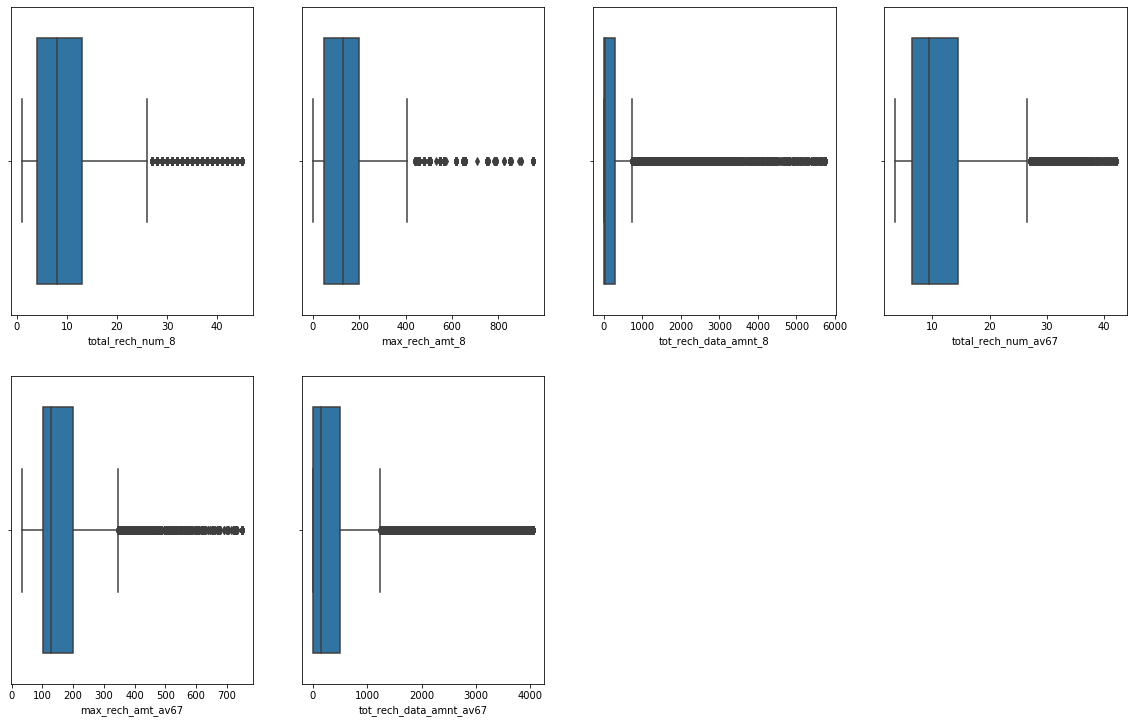

In [139]:
#Checking for outliers in recharge columns and treating them by replacing the lower outliers with 5% value and higher outlier with 99% 
col_list = churn_hv_cust.filter(regex='_rech_')
plt.figure(figsize = (20, 60))
for i in enumerate(col_list+1):
    plt.subplot(9, 4, i[0]+1)
    #sns.distplot(churn_hv_cust[i[1]],hist= False)
    sns.boxplot(x = i[1], data = churn_hv_cust)
    q1= churn_hv_cust[i[1]].quantile(0.05)
    q2=churn_hv_cust[i[1]].quantile(0.99)
    churn_hv_cust[i[1]] = np.where(churn_hv_cust[i[1]] <q1, q1, churn_hv_cust[i[1]])
    churn_hv_cust[i[1]] = np.where(churn_hv_cust[i[1]] >q2, q2, churn_hv_cust[i[1]])

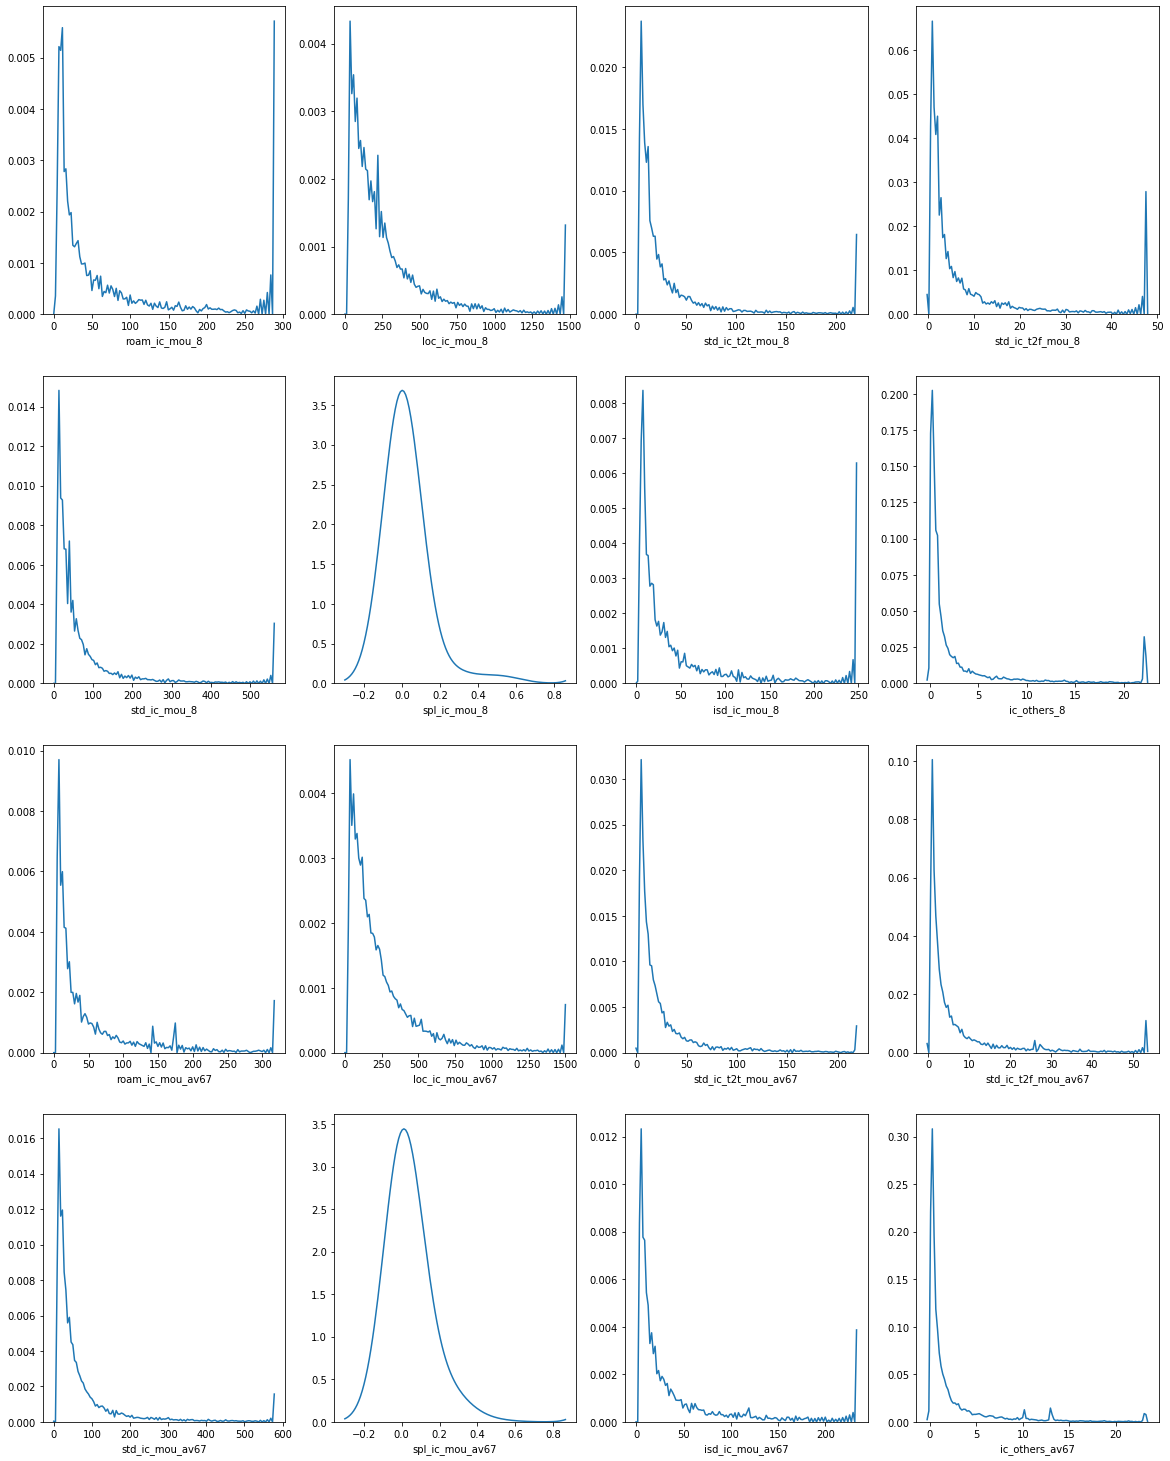

In [137]:
# Histogram for incoming mou
col_list = churn_hv_cust.filter(like='ic') 
plt.figure(figsize = (20, 60))
for i in enumerate(col_list+1):
    plt.subplot(9, 4, i[0]+1)
    churn_hv_cust[i[1]].round(decimals=2)
    sns.distplot(churn_hv_cust[i[1]],hist= False,kde_kws={'bw': 0.1})

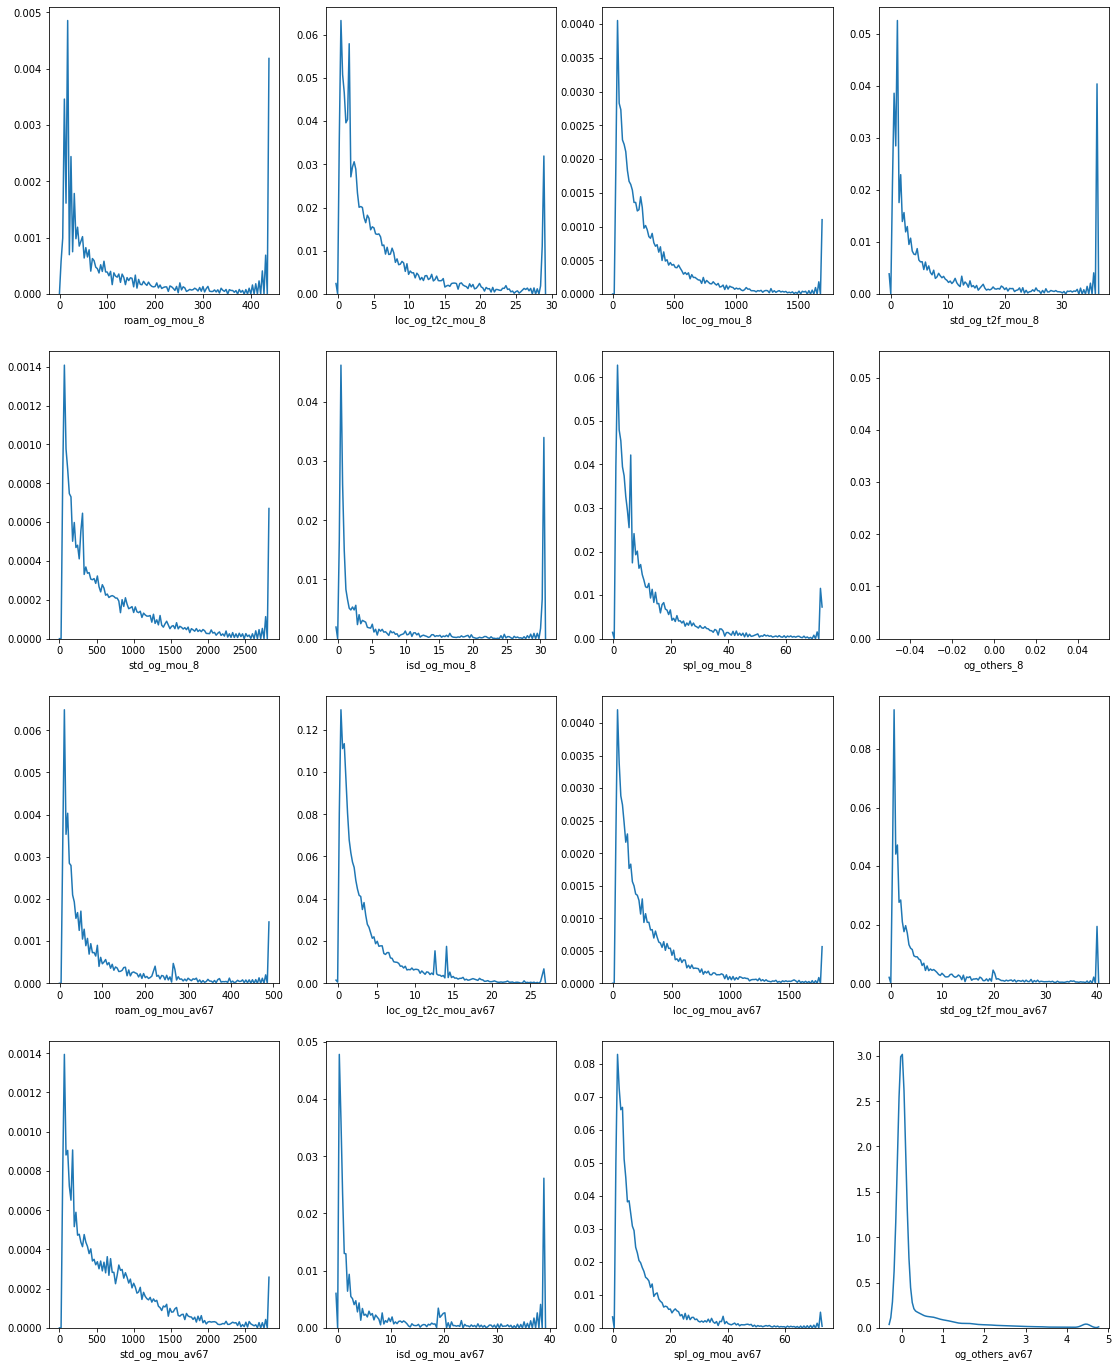

In [138]:
#Histogram for outgoing mou
col_list = churn_hv_cust.filter(like='og') 
plt.figure(figsize = (19, 56))
churn_hv_cust['total_out_8'] = 0 
churn_hv_cust['total_out_67'] = 0
for i in enumerate(col_list+1):
    plt.subplot(9, 4, i[0]+1)    
    if('8' in i[1]):
        churn_hv_cust['total_out_8'] =  churn_hv_cust[i[1]]+churn_hv_cust['total_out_8']
        churn_hv_cust['total_out_8']= churn_hv_cust['total_out_8'].round(decimals=2)
    else:
        churn_hv_cust['total_out_67'] =  churn_hv_cust['total_out_67']+churn_hv_cust[i[1]]
        churn_hv_cust['total_out_67'] = churn_hv_cust['total_out_67'].round(decimals=2)
    sns.distplot(churn_hv_cust[i[1]],hist= False,kde_kws={'bw': 0.1})

## Uninvariate analysis (Categorical)

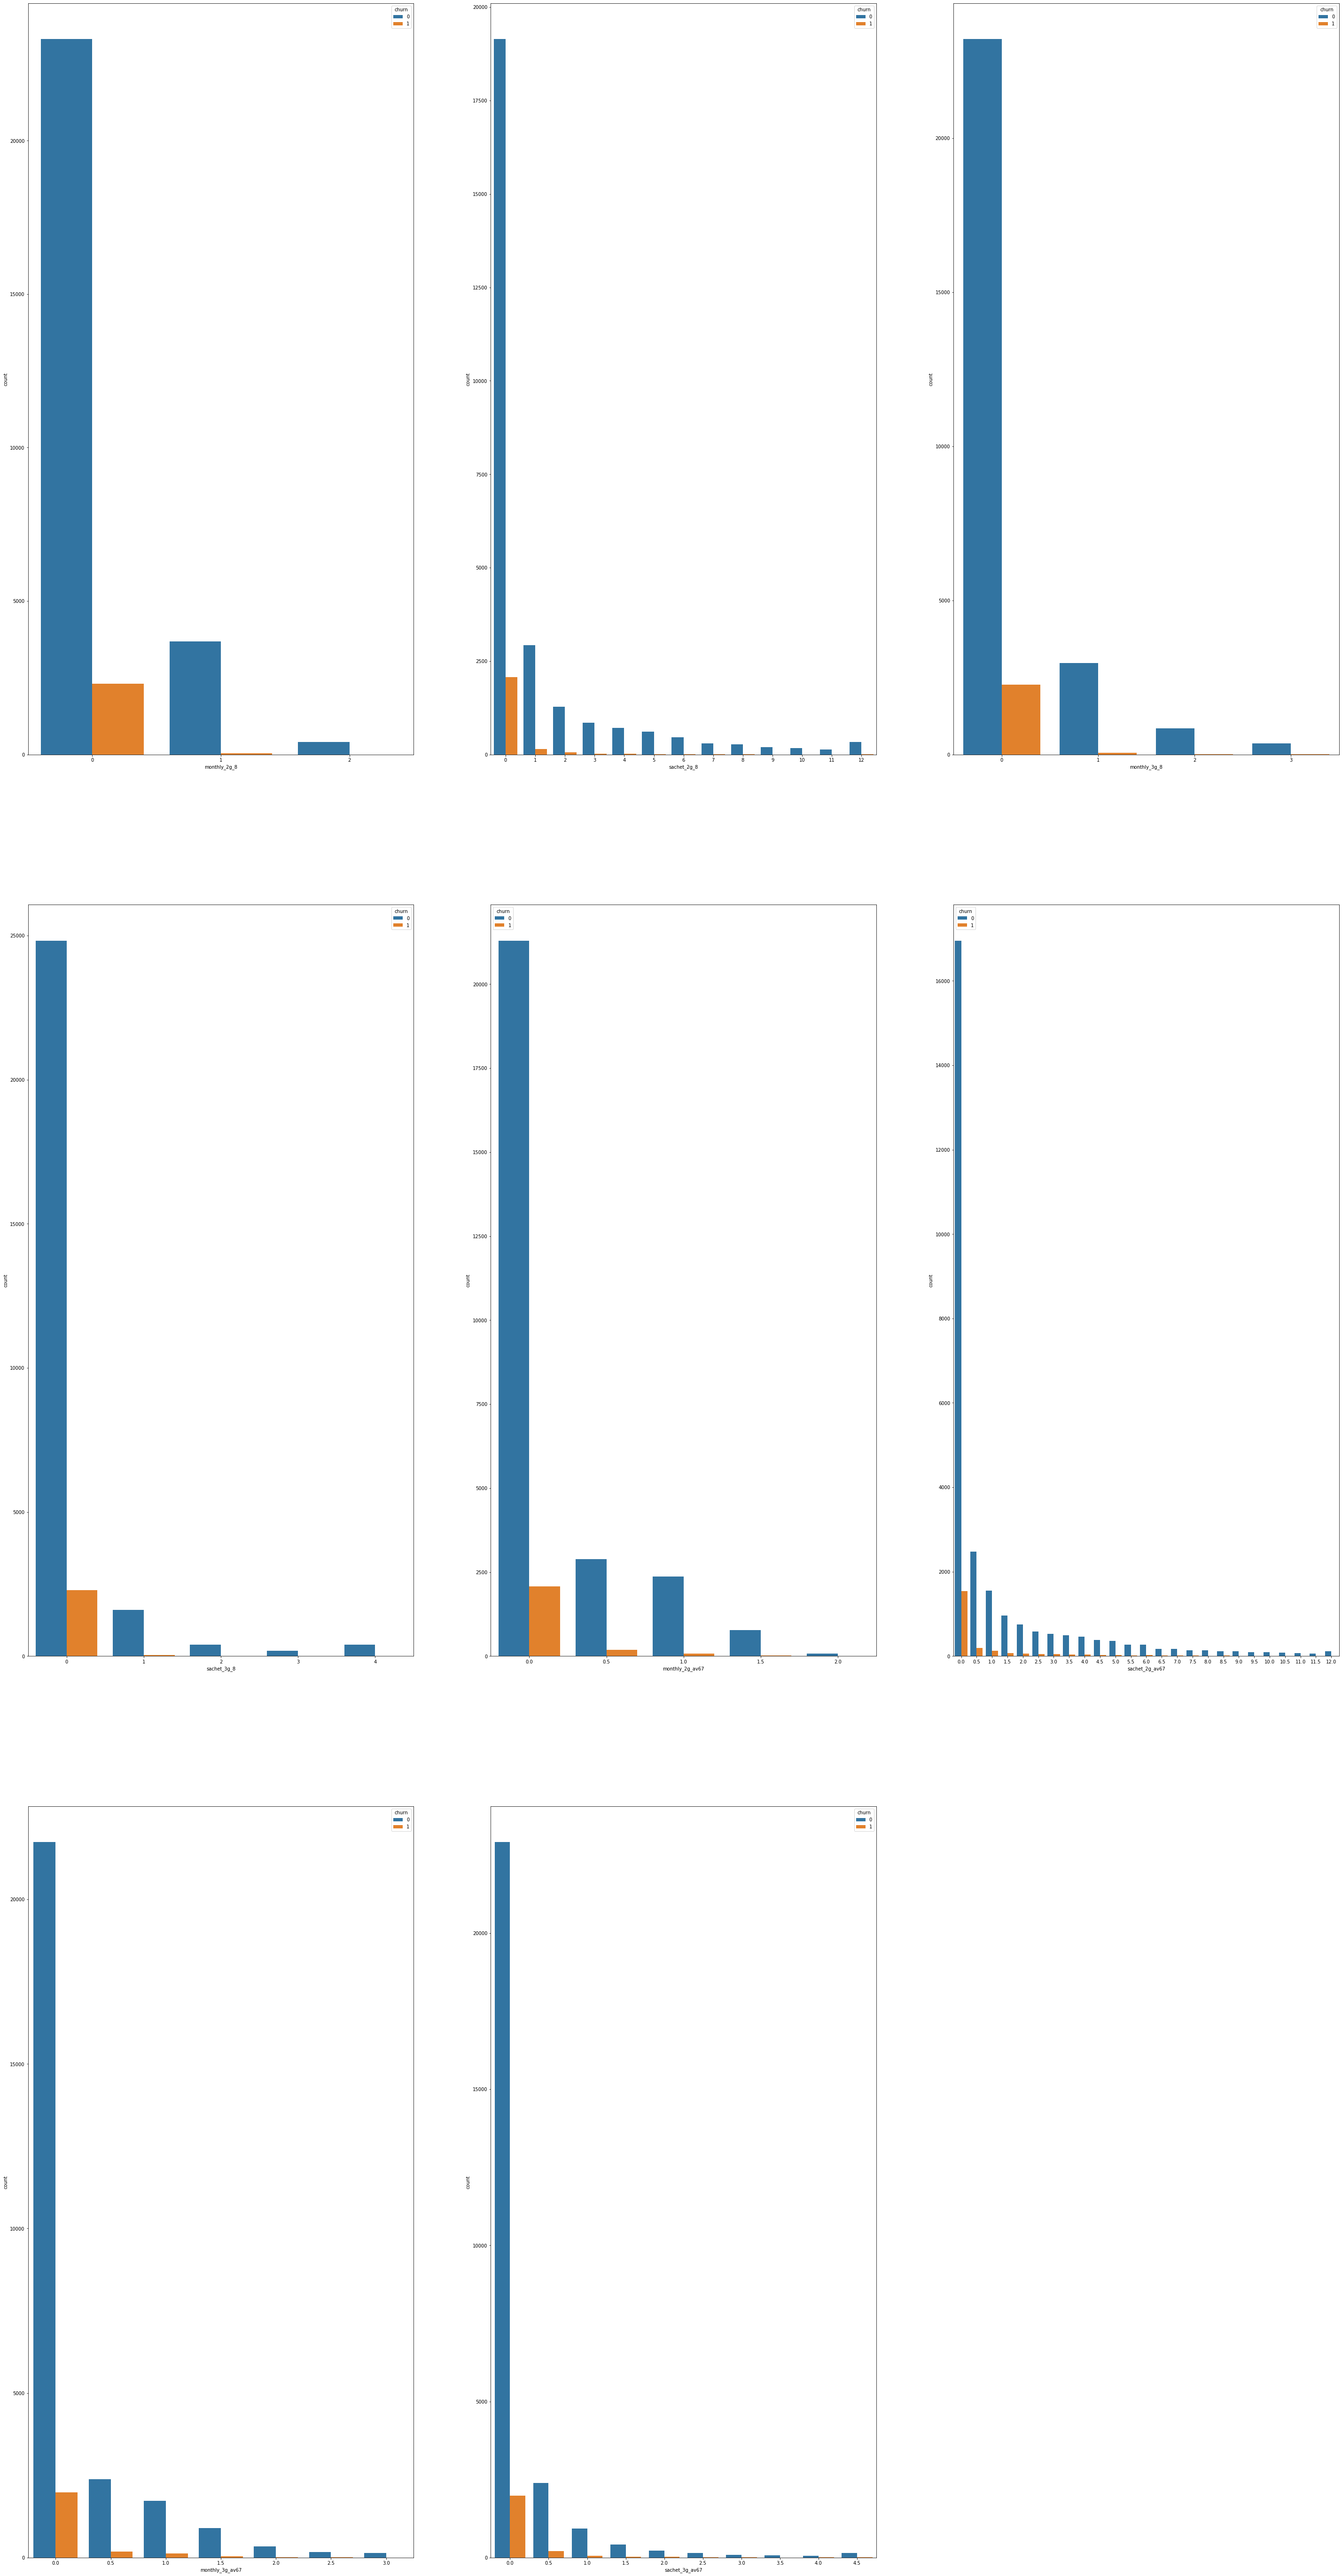

In [141]:
col_list = churn_hv_cust.filter(regex='monthly_|sachet')
plt.figure(figsize=(50,100))
for i in enumerate(col_list):
    plt.subplot(3, 3, i[0]+1)
    sns.countplot(x= i[1], hue = 'churn',data =churn_hv_cust) 
plt.show()
plt.close()

In all the above plots we notice that monthly/sachet recharge =0  in months of 6,7 and 8 are the highest churners

In [142]:
# function for Historgram
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [143]:
# function for correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = "Telecom Churn"
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [144]:
# function for scatter plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

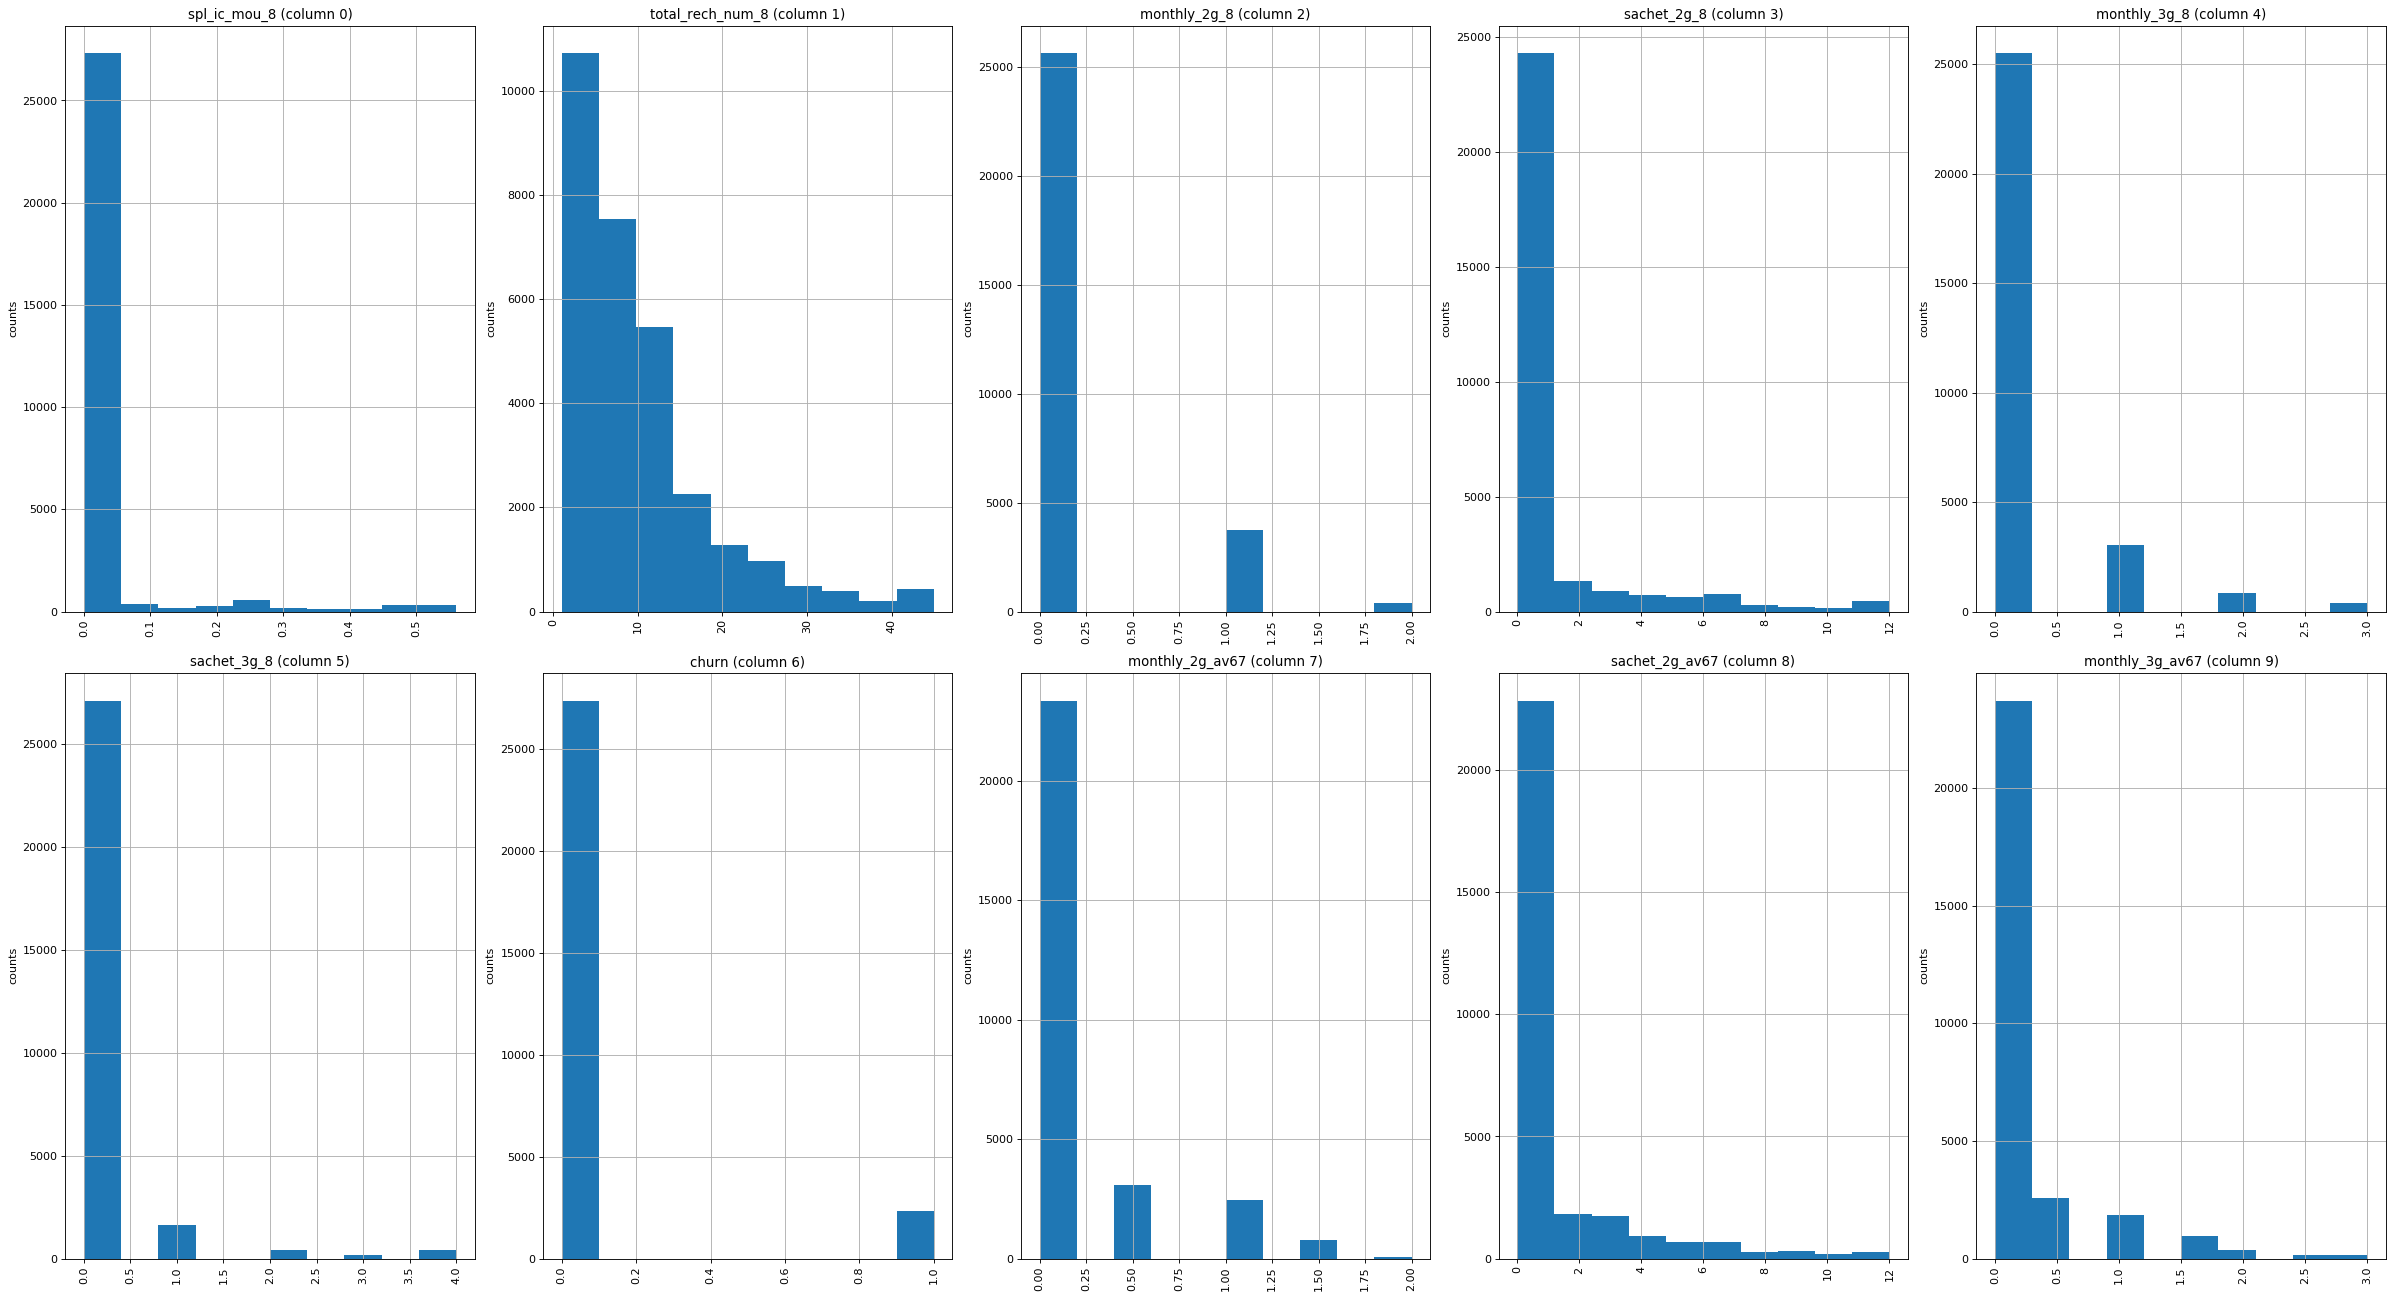

In [145]:
# Plotting with updated dataset
plotPerColumnDistribution(churn_hv_cust, 10, 5)

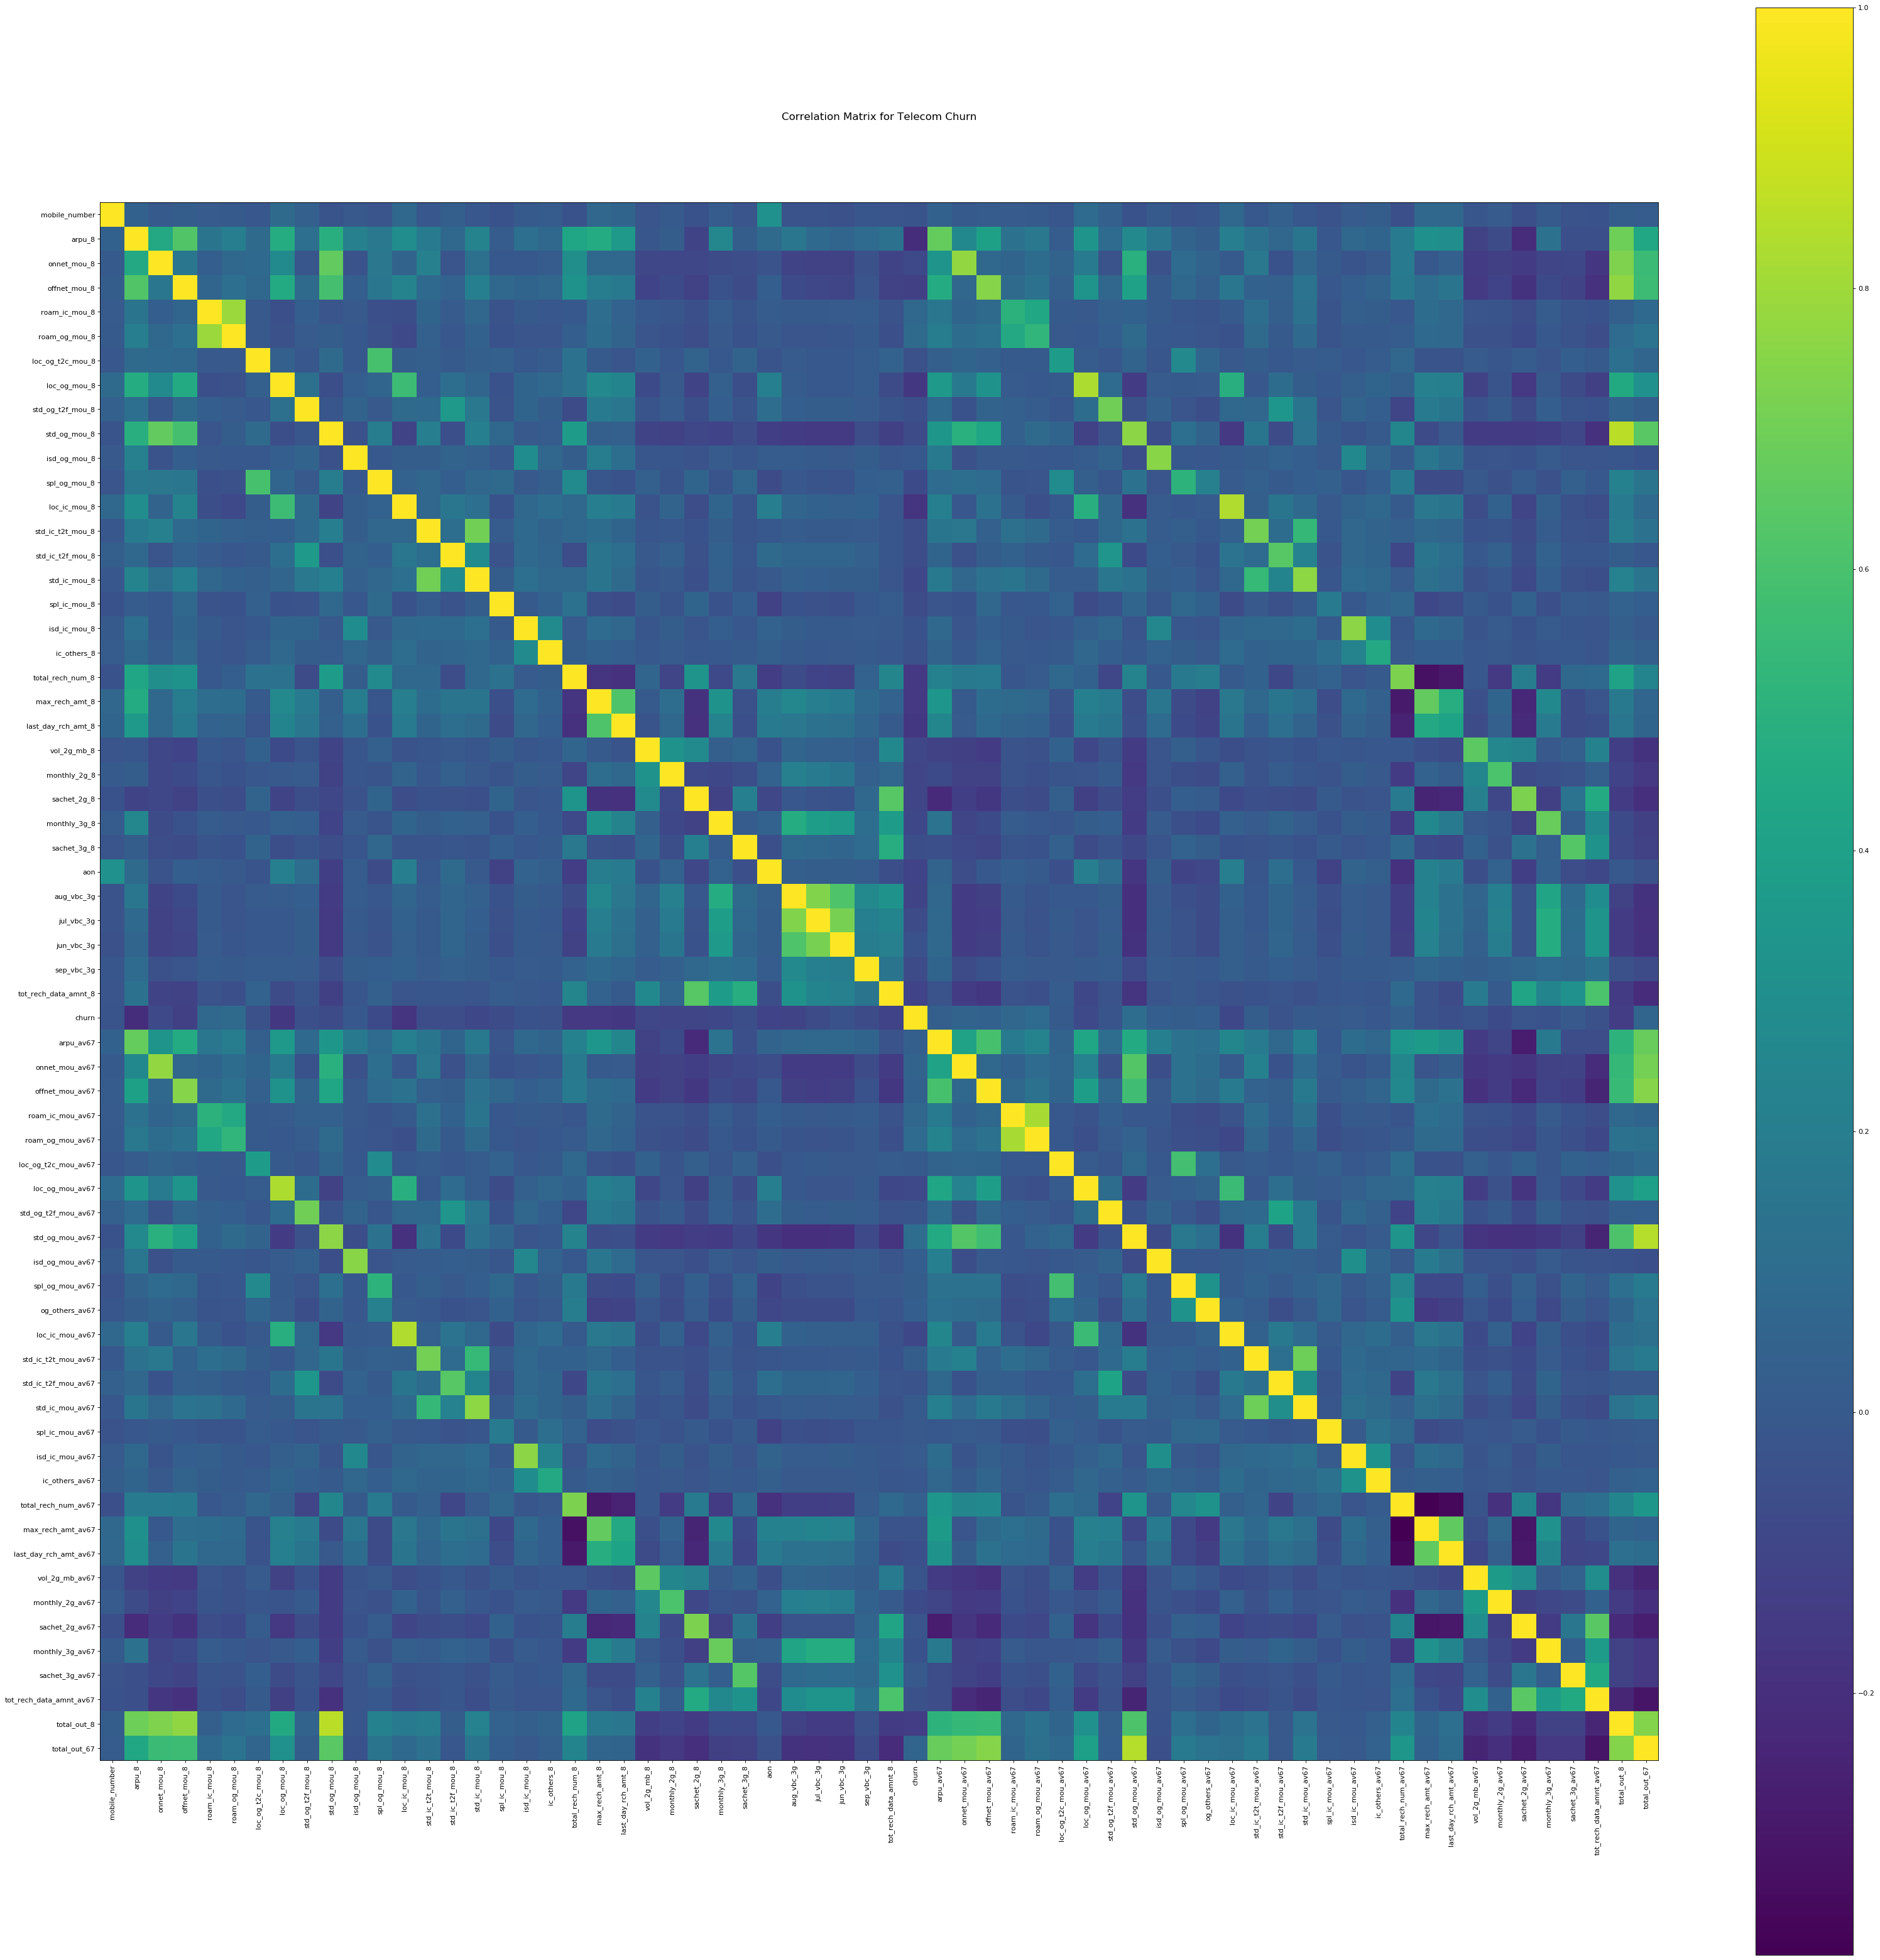

In [36]:
plotCorrelationMatrix(churn_hv_cust, 50)

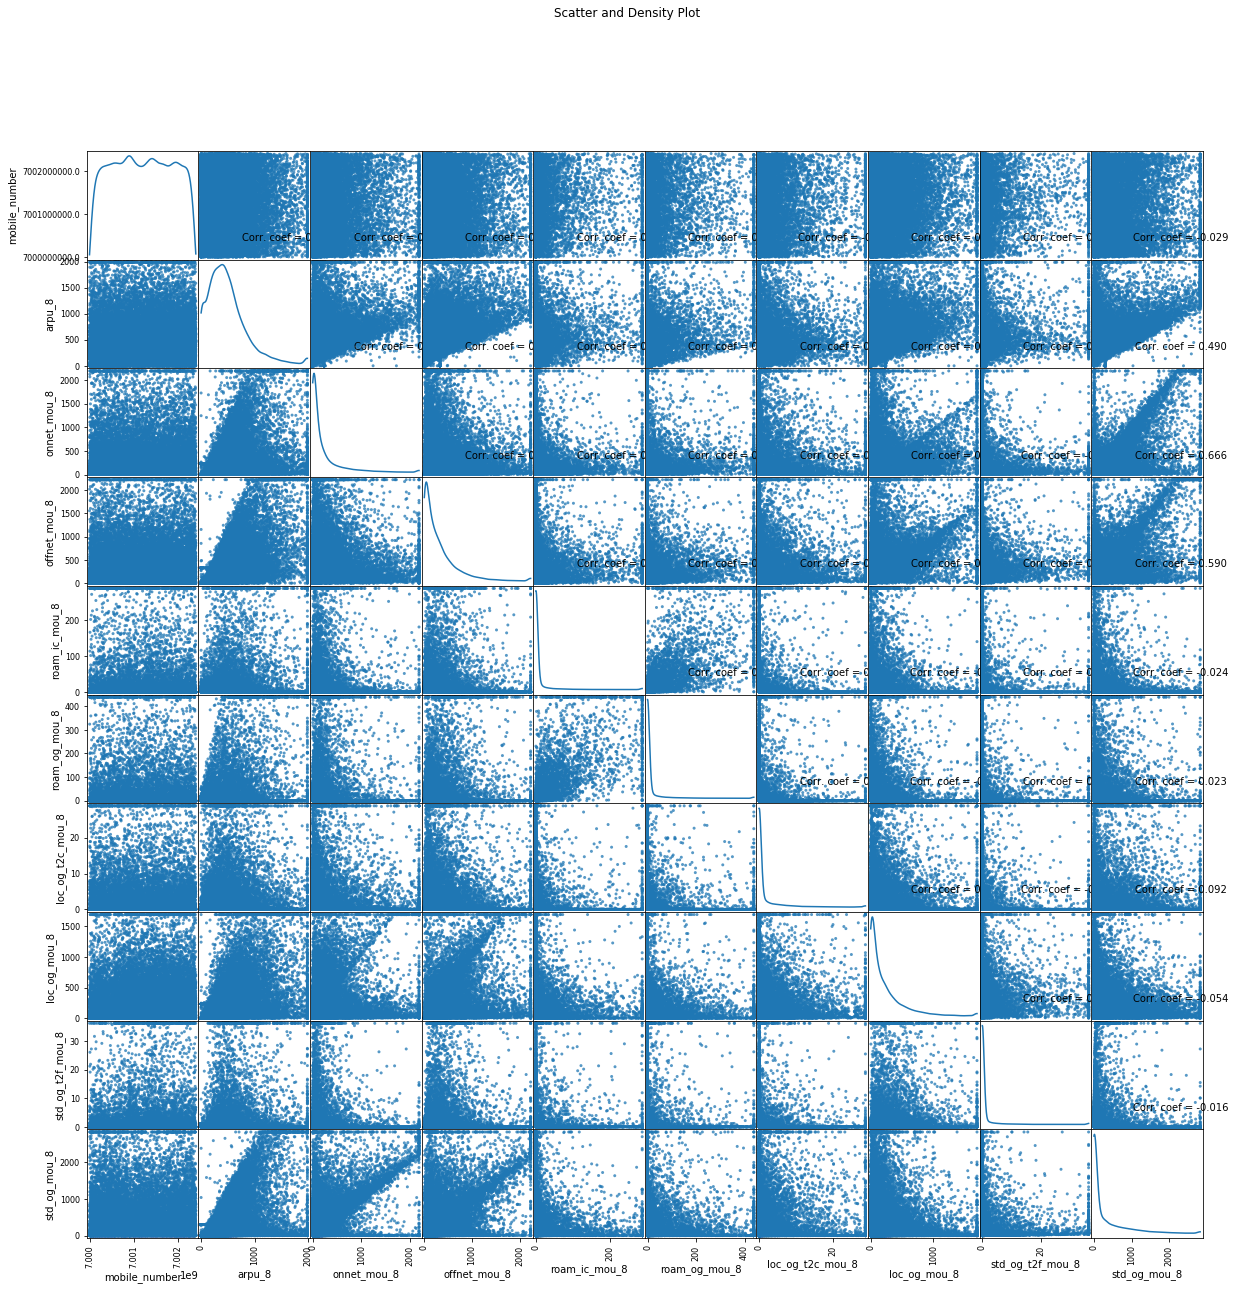

In [37]:
plotScatterMatrix(churn_hv_cust, 20, 10)

### Checking for data imbalance

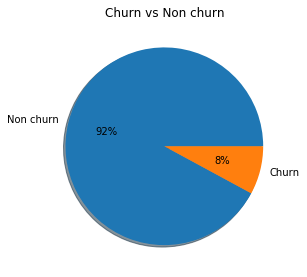

In [146]:
target_val = churn_hv_cust['churn'].value_counts()

target_val =  pd.DataFrame({'labels': target_val.index,
                   'values': target_val.values  })
target_val = target_val.replace(0,'Non churn')
target_val = target_val.replace(1,'Churn')

 

plt.figure(1, figsize=(15,10))
the_grid = GridSpec(2, 2)

target_plot = plt.subplot(the_grid[0, 0], aspect=1, title='Churn vs Non churn')

target_plot.pie(target_val["values"], labels=target_val["labels"], autopct='%.0f%%', shadow=True, )
 
plt.show() 

[Text(0, 0.5, '(%)')]

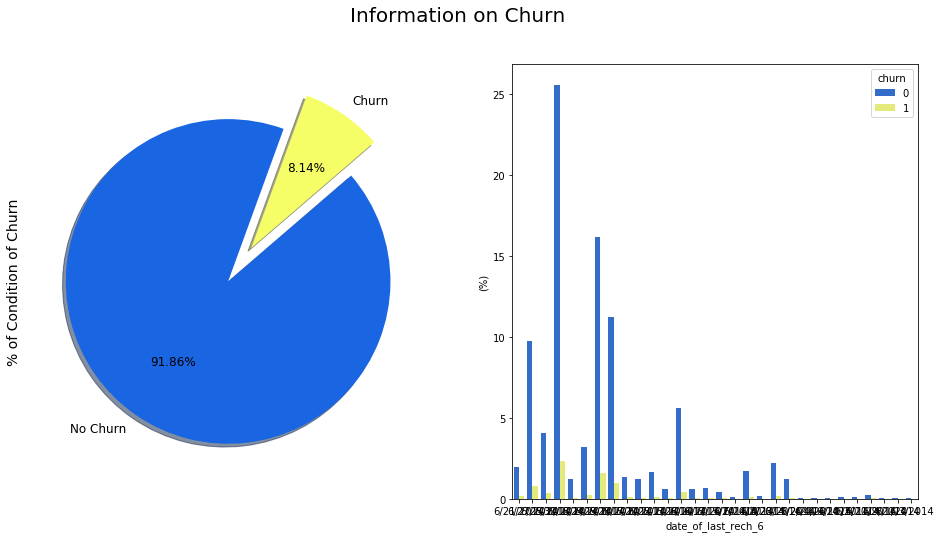

In [147]:
f, ax = plt.subplots(1,2, figsize=(16,8))
colors = ["#1a66e2", "#f5fe67"]

labels ="No Churn", "Churn"
plt.suptitle('Information on Churn', fontsize=20)

churn_hv_cust_tm["churn"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)
ax[0].set_ylabel('% of Condition of Churn', fontsize=14)

palette = ["#1a66e2", "#f5fe67"]
sns.barplot(x="date_of_last_rech_6", y="churn", hue="churn", data=churn_hv_cust_tm, palette=palette, estimator=lambda x: len(x) / len(churn_hv_cust_tm) * 100)
ax[1].set(ylabel="(%)")

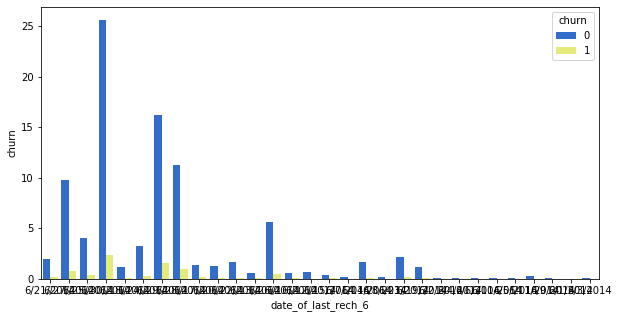

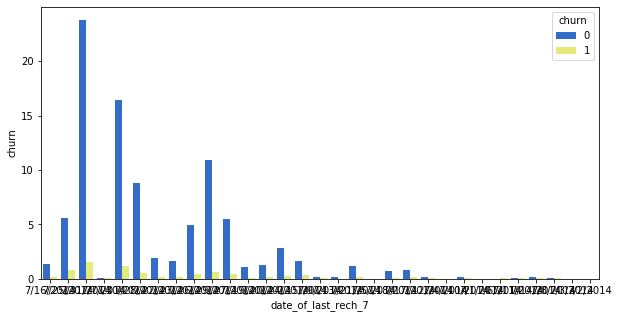

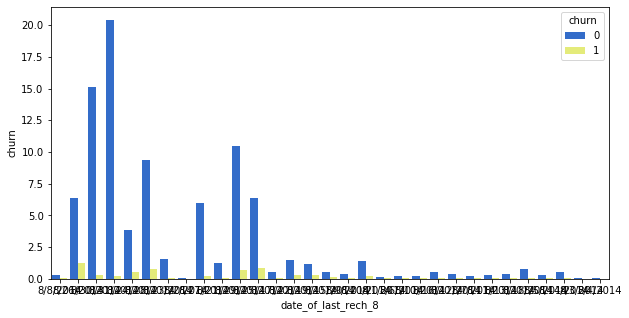

In [148]:
plt.figure(figsize=(10,5))
palette = ["#1a66e2", "#f5fe67"]
sns.barplot(x="date_of_last_rech_6", y="churn", hue="churn", data=churn_hv_cust_tm, palette=palette, 
            estimator=lambda x: len(x) / len(churn_hv_cust_tm) * 100)

plt.figure(figsize=(10,5))
palette = ["#1a66e2", "#f5fe67"]
sns.barplot(x="date_of_last_rech_7", y="churn", hue="churn", data=churn_hv_cust_tm, palette=palette, 
            estimator=lambda x: len(x) / len(churn_hv_cust_tm) * 100)

plt.figure(figsize=(10,5))
palette = ["#1a66e2", "#f5fe67"]
sns.barplot(x="date_of_last_rech_8", y="churn", hue="churn", data=churn_hv_cust_tm, palette=palette, 
            estimator=lambda x: len(x) / len(churn_hv_cust_tm) * 100)
plt.show()

# Model Building

In [149]:
df = churn_hv_cust.copy()

# Dropping tenure range because it is highly correlated with AON MONTH column
df.drop('mobile_number', axis=1, inplace=True)
df.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0    213.803         0.00          0.00           0.00           0.00   
7   1986.622        52.29        325.91          31.64          38.06   
8    137.362        35.08        136.48           0.00           0.00   
21   637.760        85.14        983.39           0.00           0.00   
23   366.966        33.58        205.89           0.00           0.00   

    loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2f_mou_8  std_og_mou_8  \
0               0.00          0.00              0.00          0.00   
7               0.00        255.79             16.68         77.84   
8               7.15         63.04              0.00         98.28   
21              0.00        129.74              0.00        938.79   
23             17.71        182.14              0.00         39.61   

    isd_og_mou_8  spl_og_mou_8  og_others_8  loc_ic_mou_8  std_ic_t2t_mou_8  \
0           0.00          0.00          0.0          5.44              0.00   
7          10.01          6.50          0.0        188.04             30.39   
8           0.00         10.23          0.0         15.79              0.10   
21          0.00          0.00          0.0        159.11              0.18   
23          0.00         17.71          0.0        224.21             13.38   

    std_ic_t2f_mou_8  std_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
0               0.00          0.00           0.0          0.00         0.00   
7              22.21        193.94           0.0         31.59        15.14   
8               0.00          0.75           0.0          0.00         0.00   
21              0.00        101.93           0.0          0.00         0.00   
23              0.00         57.29           0.0          3.74        13.06   

    total_rech_num_8  max_rech_amt_8  last_day_rch_amt_8  vol_2g_mb_8  \
0                2.0           252.0                 252         5.75   
7                7.0           951.0                 565         0.00   
8               14.0            30.0                  10         0.03   
21              27.0            50.0                  50         0.00   
23               4.0           179.0                   0         0.01   

    monthly_2g_8  sachet_2g_8  monthly_3g_8  sachet_3g_8  aon  aug_vbc_3g  \
0              0            0             1            0  968       30.40   
7              0            0             0            0  802       57.74   
8              0            3             0            0  315       21.03   
21             0            0             0            0  720        0.00   
23             0            0             1            1  604       40.45   

    jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  tot_rech_data_amnt_8  vol_diff_2g  \
0         0.00      101.20        3.58                 252.0        -5.75   
7        19.38       18.74        0.00                   0.0         0.00   
8       910.65      122.16        0.00                 207.0        -0.03   
21        0.00        0.00        0.00                   0.0         0.00   
23       51.86        0.00        0.00                 540.0        13.92   

    vol_diff_3g  churn  arpu_av67  onnet_mou_av67  offnet_mou_av67  \
0       -109.61      1   206.1005      259.003592       372.896856   
7          0.00      1  1209.5150       56.260000       510.295000   
8        -11.94      0   435.4720      382.360000        87.645000   
21         0.00      0   556.1030      117.260000       827.305000   
23      -695.18      0   134.1235       49.810000        87.385000   

    roam_ic_mou_av67  roam_og_mou_av67  loc_og_t2c_mou_av67  loc_og_mou_av67  \
0          11.813398         20.023229             1.491001       250.426542   
7          24.860000         18.165000             0.000000       478.035000   
8           0.000000          0.000000             0.000000       333.135000   
21          0.000000          0.000000             0.000000        95.565000   
23        

### Creating X & y datasets

In [150]:
cust_hv_churn_dp = df.drop(['churn'], axis=1)
X = df.drop(['churn'], axis=1)
y = df['churn']
df.drop('churn', axis=1, inplace=True)

### Scaling the dataset

In [151]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

### Train & Test Split 

In [152]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (20822, 65)
Dimension of X_test: (8925, 65)


We will try different models for our case study.

## Linear SVM

In [153]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#using different params for train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

lr = LogisticRegression(class_weight='balanced')

lr.svm = SVC(kernel='linear') 
lr.svm.fit(X_train,y_train)
preds = lr.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.9225210084033614

### RFE (for feature reduction)

In [154]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced')
from sklearn.feature_selection import RFE

# 15 Most important features
rfe = RFE(lr, 15)   
rfe = rfe.fit(X_train, y_train)

In [155]:
rfe_features = list(df.columns[rfe.support_])
print("15 most important features selected by RFE ", rfe_features)

15 most important features selected by RFE  ['loc_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sep_vbc_3g', 'vol_diff_2g', 'vol_diff_3g', 'onnet_mou_av67', 'offnet_mou_av67', 'loc_og_mou_av67', 'std_og_mou_av67', 'loc_ic_mou_av67']


In [156]:
X_rfe = pd.DataFrame(data=X_train).iloc[:, rfe.support_]
y_rfe = y_train

### Logistic Regression Model using columns from RFE

In [157]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1,class_weight='balanced')
lr.fit(X_rfe, y_rfe)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Confusion Matrix

In [158]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

y_pred = lr.predict(X_test_rfe)

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print('Accuracy on the test dataset:',lr.score(X_test_rfe, y_test))

[[4204 1285]
 [  48  413]]
Accuracy on the test dataset: 0.7759663865546218


### Classification report on Test

In [159]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.77      0.86      5489
           1       0.24      0.90      0.38       461

    accuracy                           0.78      5950
   macro avg       0.62      0.83      0.62      5950
weighted avg       0.93      0.78      0.83      5950



## PCA
Performing PCA on the dataset

In [160]:
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [161]:
X_tr_pca = pca.fit_transform(X_train)
print(X_tr_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(23797, 65)
(5950, 65)


### Logistic Regression using PCA columns

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca = LogisticRegression(C=1e9,class_weight='balanced')
lr_pca.fit(X_tr_pca, y_train)

# make the predictions
y_pred = lr_pca.predict(X_test_pca)

# convert prediction array into a dataframe
y_pred_df = pd.DataFrame(y_pred)

### Confusion Matrix

In [163]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

[[4515  974]
 [  54  407]]
Accuracy of the logistic regression model with PCA:  0.8272268907563025


In [164]:
col = list(df.columns)
df_pca = pd.DataFrame({'PC-1':pca.components_[0],'PC-2':pca.components_[1], 'PC-3':pca.components_[2],'Feature':col})
df_pca.head(10)

PC-1      PC-2      PC-3           Feature
0  0.252962  0.109467  0.180675            arpu_8
1  0.215046 -0.097894  0.059862       onnet_mou_8
2  0.252142 -0.006142  0.062046      offnet_mou_8
3  0.060063  0.044094 -0.020545     roam_ic_mou_8
4  0.075905  0.024160 -0.020950     roam_og_mou_8
5  0.040756 -0.045213  0.125332  loc_og_t2c_mou_8
6  0.173357  0.122159  0.025412      loc_og_mou_8
7  0.050244  0.121500 -0.027540  std_og_t2f_mou_8
8  0.236160 -0.156847  0.076204      std_og_mou_8
9  0.032163  0.082388  0.004185      isd_og_mou_8

### Checking Variance explained by PCAs

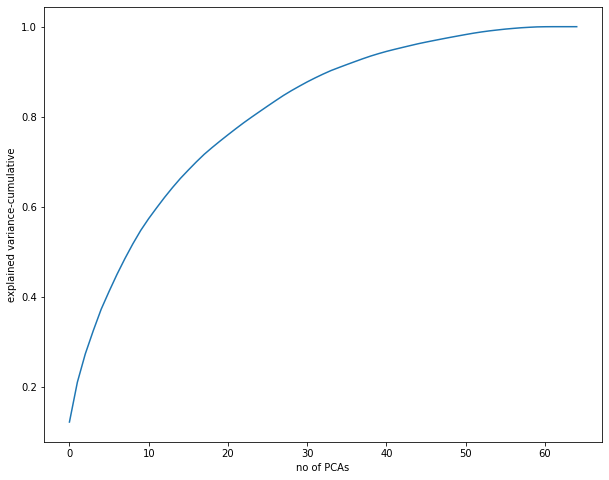

In [167]:
fig = plt.figure(figsize = (10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('no of PCAs')
plt.ylabel('explained variance-cumulative')
plt.show()

In [168]:
# 33 columns explains 90% of the variance
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([12.16, 21.  , 27.29, 32.42, 37.21, 41.18, 44.97, 48.48, 51.75,
       54.75, 57.36, 59.75, 62.07, 64.25, 66.29, 68.14, 69.94, 71.64,
       73.15, 74.59, 75.98, 77.35, 78.68, 79.93, 81.15, 82.36, 83.55,
       84.71, 85.78, 86.77, 87.73, 88.62, 89.46, 90.24, 90.91, 91.57,
       92.22, 92.86, 93.46, 94.  , 94.5 , 94.95, 95.37, 95.79, 96.2 ,
       96.57, 96.92, 97.27, 97.61, 97.93, 98.25, 98.56, 98.83, 99.07,
       99.27, 99.46, 99.61, 99.75, 99.85, 99.94, 99.98, 99.99, 99.99,
       99.99, 99.99])

## Hyperparameter tuning - PCA and Logistic Regression

In [169]:
# PCA with 33 components
pca_33 = PCA(n_components=33)

df_tr_pca_33 = pca_33.fit_transform(X_train)
print(df_tr_pca_33.shape)

df_test_pca_33 = pca_33.transform(X_test)
print(df_test_pca_33.shape)

(23797, 33)
(5950, 33)


### Logistic Regression using PCA selected variables

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr_pca1 = LogisticRegression(C=1e9,class_weight='balanced')
lr_pca1.fit(df_tr_pca_33, y_train)


# Predicted probabilities
y_pred33 = lr_pca1.predict(df_test_pca_33)

# Converting y_pred to a dataframe which is an array
df_y_pred = pd.DataFrame(y_pred33)

print("Accuracy with 33 PCAs: ",accuracy_score(y_test,y_pred33))

Accuracy with 33 PCAs:  0.8104201680672269


#### Confusion Matrix

In [172]:
y_pred_default = lr_pca1.predict(df_test_pca_33)

confusion = confusion_matrix(y_test,y_pred33)

confusion

array([[4428, 1061],
       [  67,  394]], dtype=int64)

### Applying PCA to test data

In [174]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=40)

df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

#Applying selected components to the test data - 20 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(5950, 40)

## Model Evaluation

In [175]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score : ',accuracy_score(y_test,y_pred_default))

# Sensitivity
print('Sensitivity: ', TP / float(TP+FN))

# Specificity
print('Specificity: ',TN / float(TN+FP))

# False postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# Positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

Accuracy Score :  0.8104201680672269
Sensitivity:  0.8546637744034707
Specificity:  0.8067043177263619
false postive rate:  0.1932956822736382
positive predictive value:  0.27079037800687283
Negative predictive value:  0.9850945494994439


### Conclusions from the above model:

* Model has 81% Accuracy, 33 features can explain the variance in the dataset.
* Most important features: arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8
* Accuracy Score : 81%
* Sensitivity:  85.4%
* Specificity:  80.6%
* false postive rate:  19.3%
* positive predictive value: 27%
* Negative predictive value:  98.5%

# Random Forests

In [176]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [177]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                   

### Best AUC & best Hyperparameters

In [179]:
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9434092596928835
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


### Confusion Matrix & AUC

In [180]:
from sklearn.metrics import roc_auc_score
# predict churn on test data
y_pred = model.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC: ", round(roc_auc_score(y_test, y_pred_prob),2))

[[5404   85]
 [ 212  249]]
AUC:  0.95


In [ ]:
confusion_rf = confusion_matrix(y_test, y_pred)

## Hyperparameter Tuning

In [182]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf_with_pca = RandomForestClassifier(class_weight='balanced')

# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, cv=n_folds, scoring="accuracy", n_jobs=-1)
rf_with_pca.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

### Model Evaluation

In [184]:
TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

# Sensitivity
print('Sensitivity: ', TP / float(TP+FN))

# Specificity
print('Specificity: ',TN / float(TN+FP))

# False postive rate - predicting churn when customer does not have churned
print('False postive rate: ',FP/ float(TN+FP))

# Positive predictive value 
print('Positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.5401301518438177
Specificity:  0.9845144835124795
False postive rate:  0.015485516487520496
Positive predictive value:  0.7455089820359282
Negative predictive value:  0.9622507122507122
Misclassification Rate:  0.04991596638655462


### Conclusions from the above model:

* Sensitivity:  54%
* Specificity:  98.4%
* false postive rate:  1.5%
* Positive predictive value: 74.5%
* Negative predictive value:  96.2%
* Misclassification Rate:  4.9%

## Decision Trees

In [185]:
# feature selection using Lasso regression
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
svc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_train, y_train)
svc_model = SelectFromModel(svc, prefit=True)
X_lasso = svc_model.transform(X_train)
position = svc_model.get_support(indices=True)

print(X_lasso.shape)
print(position)

(23797, 20)
[ 0  4 12 15 16 19 20 21 22 23 24 27 28 34 35 39 43 44 58 63]


In [186]:
# feature vector for decision trees
lasso_features = list(df.columns[position])
print("Lasso Features: ", lasso_features)

Lasso Features:  ['arpu_8', 'roam_og_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'aon', 'aug_vbc_3g', 'vol_diff_3g', 'arpu_av67', 'roam_og_mou_av67', 'std_og_mou_av67', 'isd_og_mou_av67', 'monthly_2g_av67', 'total_out_8']


In [187]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Decision tree with default hyper parameters except max depth to make the tree readable
dt1 = DecisionTreeClassifier(max_depth=5)
dt1.fit(X_lasso, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Classification Report

In [188]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Model predictions
X_test = pd.DataFrame(data=X_test).iloc[:, position]
y_pred1 = dt1.predict(X_test)

# classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5489
           1       0.72      0.49      0.59       461

    accuracy                           0.95      5950
   macro avg       0.84      0.74      0.78      5950
weighted avg       0.94      0.95      0.94      5950



In [189]:
confusion_tree = confusion_matrix(y_test,y_pred1)
confusion_tree

array([[5401,   88],
       [ 234,  227]], dtype=int64)

## Hyperparameter Tuning

In [190]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)
                               
# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
tree.fit(X_lasso, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
 

## Model Evaluation

In [191]:
confusion_tree = confusion_matrix(y_test,y_pred_default)
TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Acuracy Score', accuracy_score(y_test,y_pred_default))

# Sensitivity 
print('Sensitivity: ', TP / float(TP+FN))

# Specificity
print('Specificity: ',TN / float(TN+FP))

# False postive rate - predicting churn when customer does not have churned
print('False postive rate: ',FP/ float(TN+FP))

# Positive predictive value 
print('Positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Acuracy Score 0.8104201680672269
Sensitivity:  0.8546637744034707
Specificity:  0.8067043177263619
False postive rate:  0.1932956822736382
Positive predictive value:  0.27079037800687283
Negative predictive value:  0.9850945494994439
Misclassification Rate:  0.1895798319327731


### Conclusions from the above model:

* Accuracy: 81%
* Sensitivity:  85.4%
* Specificity:  80.6%
* False postive rate:  19.3%
* Positive predictive value: 27%
* Negative predictive value:  98.5%
* Misclassification Rate:  18.9%

# Selection of Appropriate Model

Considering all the evaluation metrics tested for above, Logistic Regression seems to be the most appropriate model for our Business Problem

# Selecting Best Features
### Based on Logistic Regression

In [192]:
# running a random forest model on train data
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

8


In [193]:
# fit model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.8s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.1, 1: 0.9}, criterion='gini',
                       max_depth=None, max_features=8, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=True,
                       random_state=4, verbose=1, warm_start=False)

In [194]:
# OOB score
rf_model.oob_score_

0.9483128125393957

In [195]:
# predictors
features = df

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


variables  importance_percentage
0                (l, o, c, _, i, c, _, m, o, u, _, 8)               9.930216
1                                  (a, r, p, u, _, 8)               7.117737
2   (l, a, s, t, _, d, a, y, _, r, c, h, _, a, m, ...               6.504285
3                (l, o, c, _, o, g, _, m, o, u, _, 8)               5.733216
4             (r, o, a, m, _, o, g, _, m, o, u, _, 8)               4.794432
5                   (v, o, l, _, d, i, f, f, _, 2, g)               4.062179
6             (r, o, a, m, _, i, c, _, m, o, u, _, 8)               3.675223
7          (m, a, x, _, r, e, c, h, _, a, m, t, _, 8)               3.460045
8   (t, o, t, _, r, e, c, h, _, d, a, t, a, _, a, ...               3.279283
9                   (v, o, l, _, 2, g, _, m, b, _, 8)               2.814219
10               (s, t, d, _, i, c, _, m, o, u, _, 8)               2.686812
11                  (v, o, l, _, d, i, f, f, _, 3, g)               2.460431
12                  (t, o, t, a, l, _, o, u, t, _, 8)               2.427508
13               (o, f, f, n, e, t, _, m, o, u, _, 8)               2.351982
14   (t, o, t, a, l, _, r, e, c, h, _, n, u, m, _, 8)               1.916716
15      (s, t, d, _, o, g, _, m, o, u, _, a, v, 6, 7)               1.677072
16                                          (a, o, n)               1.600033
17      (l, o, c, _, i, c, _, m, o, u, _, a, v, 6, 7)               1.587188
18                        (a, r, p, u, _, a, v, 6, 7)               1.511464
19               (s, t, d, _, o, g, _, m, o, u, _, 8)               1.483614
20               (t, o, t, a, l, _, o, u, t, _, 6, 7)               1.434386
21      (l, o, c, _, o, g, _, m, o, u, _, a, v, 6, 7)               1.414252
22      (o, f, f, n, e, t, _, m, o, u, _, a, v, 6, 7)               1.399909
23  (t, o, t, a, l, _, r, e, c, h, _, n, u, m, _, ...               1.327352
24                  (o, n, n, e, t, _, m, o, u, _, 8)               1.294545
25         (o, n, n, e, t, _, m, o, u, _, a, v, 6, 7)               1.281213
26      (s, t, d, _, i, c, _, m, o, u, _, a, v, 6, 7)               1.048461
27   (r, o, a, m, _, o, g, _, m, o, u, _, a, v, 6, 7)               1.027422
28  (m, a, x, _, r, e, c, h, _, a, m, t, _, a, v, ...               1.000019
29  (l, a, s, t, _, d, a, y, _, r, c, h, _, a, m, ...               0.977240
30  (s, t, d, _, i, c, _, t, 2, t, _, m, o, u, _, ...               0.944547
31   (s, t, d, _, i, c, _, t, 2, t, _, m, o, u, _, 8)               0.910950
32      (s, p, l, _, o, g, _, m, o, u, _, a, v, 6, 7)               0.905619
33   (r, o, a, m, _, i, c, _, m, o, u, _, a, v, 6, 7)               0.889848
34               (s, p, l, _, o, g, _, m, o, u, _, 8)               0.827488
35  (t, o, t, _, r, e, c, h, _, d, a, t, a, _, a, ...               0.800101
36         (v, o, l, _, 2, g, _, m, b, _, a, v, 6, 7)               0.748724
37                     (a, u, g, _, v, b, c, _, 3, g)               0.743566
38   (s, t, d, _, i, c, _, t, 2, f, _, m, o, u, _, 8)               0.619486
39      (i, s, d, _, o, g, _, m, o, u, _, a, v, 6, 7)               0.598876
40  (l, o, c, _, o, g, _, t, 2, c, _, m, o, u, _, ...               0.576173
41      (i, s, d, _, i, c, _, m, o, u, _, a, v, 6, 7)               0.545923
42         (i, c, _, o, t, h, e, r, s, _, a, v, 6, 7)               0.526819
43               (s, p, l, _, i, c, _, m, o, u, _, 8)               0.515702
44                  (i, c, _, o, t, h, e, r, s, _, 8)               0.481114
45                     (j, u, n, _, v, b, c, _, 3, g)               0.470323
46      (s, p, l, _, i, c, _, m, o, u, _, a, v, 6, 7)               0.468204
47  (s, t, d, _, i, c, _, t, 2, f, _, m, o, u, _, ...               0.455675
48                     (j, u, l, _, v, b, c, _, 3, g)               0.445282
49         (o, g, _, o, t, h, e, r, s, _, a, v, 6, 7)               0.422372
50               (i, s, d, _, o, g, _, m, o, u, _, 8)               0.388187
51   (l, o, c, _, o, g, _, t, 2, c, _, m

## Extracting Top 30 features

In [196]:
# extract top 'n' features
top_n = 30
top_features = feature_importance.variables[0:top_n]
top_features

0                  (l, o, c, _, i, c, _, m, o, u, _, 8)
1                                    (a, r, p, u, _, 8)
2     (l, a, s, t, _, d, a, y, _, r, c, h, _, a, m, ...
3                  (l, o, c, _, o, g, _, m, o, u, _, 8)
4               (r, o, a, m, _, o, g, _, m, o, u, _, 8)
5                     (v, o, l, _, d, i, f, f, _, 2, g)
6               (r, o, a, m, _, i, c, _, m, o, u, _, 8)
7            (m, a, x, _, r, e, c, h, _, a, m, t, _, 8)
8     (t, o, t, _, r, e, c, h, _, d, a, t, a, _, a, ...
9                     (v, o, l, _, 2, g, _, m, b, _, 8)
10                 (s, t, d, _, i, c, _, m, o, u, _, 8)
11                    (v, o, l, _, d, i, f, f, _, 3, g)
12                    (t, o, t, a, l, _, o, u, t, _, 8)
13                 (o, f, f, n, e, t, _, m, o, u, _, 8)
14     (t, o, t, a, l, _, r, e, c, h, _, n, u, m, _, 8)
15        (s, t, d, _, o, g, _, m, o, u, _, a, v, 6, 7)
16                                            (a, o, n)
17        (l, o, c, _, i, c, _, m, o, u, _, a, v

In [197]:
top_ftr_list = top_features.to_list()

ftr = feature_importance[feature_importance['variables'].isin(top_ftr_list)]
ftr['variables'] = ftr['variables'].astype(str)
ftr

variables  importance_percentage
0   ('l', 'o', 'c', '_', 'i', 'c', '_', 'm', 'o', ...               9.930216
1                      ('a', 'r', 'p', 'u', '_', '8')               7.117737
2   ('l', 'a', 's', 't', '_', 'd', 'a', 'y', '_', ...               6.504285
3   ('l', 'o', 'c', '_', 'o', 'g', '_', 'm', 'o', ...               5.733216
4   ('r', 'o', 'a', 'm', '_', 'o', 'g', '_', 'm', ...               4.794432
5   ('v', 'o', 'l', '_', 'd', 'i', 'f', 'f', '_', ...               4.062179
6   ('r', 'o', 'a', 'm', '_', 'i', 'c', '_', 'm', ...               3.675223
7   ('m', 'a', 'x', '_', 'r', 'e', 'c', 'h', '_', ...               3.460045
8   ('t', 'o', 't', '_', 'r', 'e', 'c', 'h', '_', ...               3.279283
9   ('v', 'o', 'l', '_', '2', 'g', '_', 'm', 'b', ...               2.814219
10  ('s', 't', 'd', '_', 'i', 'c', '_', 'm', 'o', ...               2.686812
11  ('v', 'o', 'l', '_', 'd', 'i', 'f', 'f', '_', ...               2.460431
12  ('t', 'o', 't', 'a', 'l', '_', 'o', 'u', 't', ...               2.427508
13  ('o', 'f', 'f', 'n', 'e', 't', '_', 'm', 'o', ...               2.351982
14  ('t', 'o', 't', 'a', 'l', '_', 'r', 'e', 'c', ...               1.916716
15  ('s', 't', 'd', '_', 'o', 'g', '_', 'm', 'o', ...               1.677072
16                                    ('a', 'o', 'n')               1.600033
17  ('l', 'o', 'c', '_', 'i', 'c', '_', 'm', 'o', ...               1.587188
18      ('a', 'r', 'p', 'u', '_', 'a', 'v', '6', '7')               1.511464
19  ('s', 't', 'd', '_', 'o', 'g', '_', 'm', 'o', ...               1.483614
20  ('t', 'o', 't', 'a', 'l', '_', 'o', 'u', 't', ...               1.434386
21  ('l', 'o', 'c', '_', 'o', 'g', '_', 'm', 'o', ...               1.414252
22  ('o', 'f', 'f', 'n', 'e', 't', '_', 'm', 'o', ...               1.399909
23  ('t', 'o', 't', 'a', 'l', '_', 'r', 'e', 'c', ...               1.327352
24  ('o', 'n', 'n', 'e', 't', '_', 'm', 'o', 'u', ...               1.294545
25  ('o', 'n', 'n', 'e', 't', '_', 'm', 'o', 'u', ...               1.281213
26  ('s', 't', 'd', '_', 'i', 'c', '_', 'm', 'o', ...               1.048461
27  ('r', 'o', 'a', 'm', '_', 'o', 'g', '_', 'm', ...               1.027422
28  ('m', 'a', 'x', '_', 'r', 'e', 'c', 'h', '_', ...               1.000019
29  ('l', 'a', 's', 't', '_', 'd', 'a', 'y', '_', ...               0.977240

### Top Features by Importance

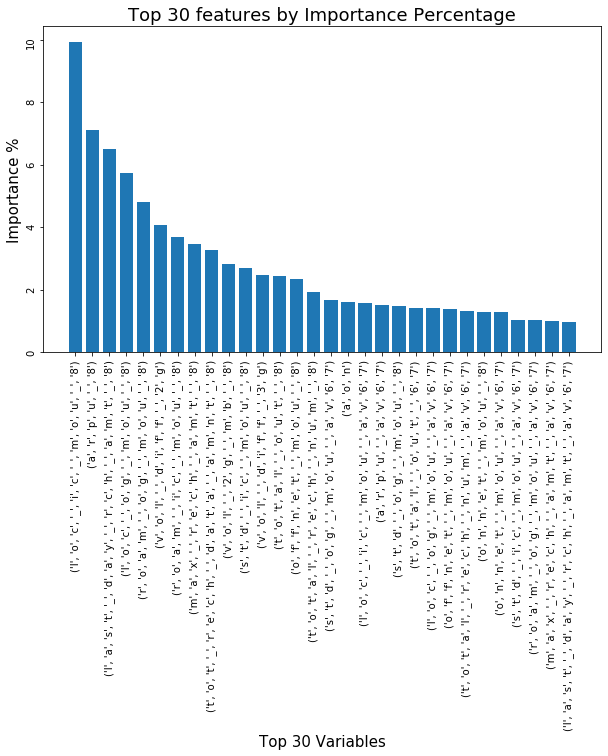

In [199]:
top_ftr = ftr.sort_values('importance_percentage',ascending=False)
plt.figure(figsize=(10,6))
plt.bar('variables', 'importance_percentage',data=top_ftr)
plt.xlabel("Top 30 Variables", size=15)
plt.ylabel("Importance %", size=15)
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.title("Top 30 features by Importance Percentage", size=18)
plt.show()

In [200]:
from sklearn.pipeline import Pipeline

# logistic regression
steps = [('scaler', StandardScaler()), ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))  ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [201]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   16.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight={0: 0.1,
                                                                         1: 0.9},
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
      

### Best AUC & Best Hyperparameters

In [202]:
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9144856827101027
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


### Confusion Matrix & ROC AUC

In [203]:
# predict churn on test data
y_pred_x = model.predict(X_train)

# confusion matrix
cm = confusion_matrix(y_train, y_pred_x)
print(cm)

# check area under curve
y_pred_prob_x = model.predict_proba(X_train)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_train, y_pred_prob_x),2))

[[18755  3153]
 [  288  1601]]
ROC:    	 0.92


In [204]:
confusion_feature = confusion_matrix(y_train,y_pred_x)

array([[18755,  3153],
       [  288,  1601]], dtype=int64)

### Final Evaluation Metrics

In [205]:
TP = confusion_feature[1,1] # true positive 
TN = confusion_feature[0,0] # true negatives
FP = confusion_feature[0,1] # false positives
FN = confusion_feature[1,0] # false negatives

print('Acuracy Score', accuracy_score(y_train,y_pred_x))

# Sensitivity 
print('Sensitivity: ', TP / float(TP+FN))

# Specificity
print('Specificity: ',TN / float(TN+FP))

# False postive rate - predicting churn when customer does not have churned
print('False postive rate: ',FP/ float(TN+FP))

# Positive predictive value 
print('Positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Acuracy Score 0.8554019414211875
Sensitivity:  0.8475383800952885
Specificity:  0.8560799707869271
False postive rate:  0.14392002921307284
Positive predictive value:  0.33676903660075724
Negative predictive value:  0.9848763325106338
Misclassification Rate:  0.14459805857881244


## Business Recommendations

* The company should focus on Local Calls and Minutes of Usage
* There is good potential in the net volume of Max Recharge Amounts, the frequency of which is impacted by the first factor (Local Usage and Minutes of Usage)
* The focus should on equitable growth in net volume of smaller local recharges while accounting for a market based ticket value for each transaction
* This would help in spreading out the revenue streams currently having a high dependency on the Postpaid Consumers.
* This would also ensure minimum churn in the prepaid small ticket customers who are most difficult to detect in cases of attrition